In [1]:
from dipy.tracking.streamline import set_number_of_points
import numpy as np
import nibabel as nib
import glob
import os
import random
import pickle
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from nilab.load_trk import load_streamlines
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.neighbors import KNeighborsClassifier
from dipy.tracking.streamline import length
from __future__ import print_function, division

In [2]:
def save_trk(streamlines, out_file, affine, vox_sizes, dim, vox_order='LAS'):
    """
    This function saves tracts in Trackvis '.trk' format.
    """
    # Create a new header with the correct affine 
    hdr = nib.streamlines.trk.TrkFile.create_empty_header()
    hdr['voxel_sizes'] = vox_sizes
    hdr['voxel_order'] = vox_order
    hdr['dimensions'] = dim
    hdr['voxel_to_rasmm'] = affine
    hdr['nb_streamlines'] = len(streamlines)

    t = nib.streamlines.tractogram.Tractogram(streamlines=streamlines, affine_to_rasmm=np.eye(4))
    nib.streamlines.save(t, out_file, header=hdr)

# Loading data

In [89]:
t_file_ref = '/home/ruben/Downloads/Subjects/Subject_20_FeMa/TRK/Tractography/Subject_20_FeMa_dti_det.trk'
trct_ref = nib.streamlines.load(t_file_ref)
#X_test_gin = list(trct_gin.streamlines)

In [3]:
t_file_s014 = '/home/ruben/Thesis/data/sub-105014/sub-105014_var-HCP_full_tract.trk'
trct_s014 = nib.streamlines.load(t_file_s014)
X_test_s014 = list(trct_s014.streamlines)

In [4]:
t_file_s115 = '/home/ruben/Thesis/data/sub-105115/sub-105115_var-HCP_full_tract.trk'
trct_s115 = nib.streamlines.load(t_file_s115)
X_test_s115 = list(trct_s115.streamlines)

In [5]:
t_file_s216 = '/home/ruben/Thesis/data/sub-105216/sub-105216_var-HCP_full_tract.trk'
trct_s216 = nib.streamlines.load(t_file_s216)
X_test_s216 = trct_s216.streamlines

In [3]:
t_file_s620 = '/home/ruben/Thesis/data/sub-105620/sub-105620_var-HCP_full_tract.trk'
trct_s620 = nib.streamlines.load(t_file_s620)
X_test_s620 = list(trct_s620.streamlines)

In [11]:
lengths_s620 = list(length(sls_pl_620))

In [12]:
min(lengths_s620)

19.106583467484338

In [7]:
idxs_pl = []
for i,l in enumerate(y_test_s620_sdeq):
    if l==1:
        idxs_pl.append(i)

In [9]:
sls_pl_620 = []
for i in idxs_pl:
    sls_pl_620.append(X_test_s620[i])

In [10]:
len(sls_pl_620)

457355

In [16]:
t_file_s620_orig = '/home/ruben/labdata/ExTractor_PRIVATE/derivatives/merge_shuffle_trk/sub-105620/sub-105620_var-HCP_full_tract.trk'
trct_s620_orig = nib.streamlines.load(t_file_s620_orig)
X_test_s620_orig = list(trct_s620_orig.streamlines)

In [17]:
sls_pl_620_orig = []
for i in idxs_pl:
    sls_pl_620_orig.append(X_test_s620_orig[i])

In [18]:
lengths_s620_orig = list(length(sls_pl_620_orig))

In [19]:
min(lengths_s620_orig)

20.00019569602895

In [6]:
y_pred_s014_sdeq = np.load('/home/ruben/Thesis/data/sub-105014/y_pred_sDEC_k5_16pts_fs8000.npy',allow_pickle=True)
y_test_s014_sdeq = np.load('/home/ruben/Thesis/data/sub-105014/y_test_dec.npy',allow_pickle=True)

y_pred_s115_sdeq = np.load('/home/ruben/Thesis/data/sub-105115/y_pred_sDEC_k5_16pts_fs8000.npy',allow_pickle=True)
y_test_s115_sdeq = np.load('/home/ruben/Thesis/data/sub-105115/y_test_dec.npy',allow_pickle=True)

y_pred_s216_sdeq = np.load('/home/ruben/Thesis/data/sub-105216/y_pred_sDEC_k5_16pts_fs8000.npy',allow_pickle=True)
y_test_s216_sdeq = np.load('/home/ruben/Thesis/data/sub-105216/y_test_dec.npy',allow_pickle=True)

y_pred_s620_sdeq = np.load('/home/ruben/Thesis/data/sub-105620/y_pred_sDEC_k5_16pts_fs8000.npy',allow_pickle=True)
y_test_s620_sdeq = np.load('/home/ruben/Thesis/data/sub-105620/y_test_dec.npy',allow_pickle=True)

In [8]:
y_pred_s014_gcn = np.load('/home/ruben/Thesis/data/sub-105014/y_pred_gcn_resampled16.npy',allow_pickle=True)
y_test_s014_gcn = np.load('/home/ruben/Thesis/data/sub-105014/y_test_gcn_resampled16.npy',allow_pickle=True)

y_pred_s115_gcn = np.load('/home/ruben/Thesis/data/sub-105115/y_pred_gcn_resampled16.npy',allow_pickle=True)
y_test_s115_gcn = np.load('/home/ruben/Thesis/data/sub-105115/y_test_gcn_resampled16.npy',allow_pickle=True)

y_pred_s216_gcn = np.load('/home/ruben/Thesis/data/sub-105216/y_pred_gcn_resampled16.npy',allow_pickle=True)
y_test_s216_gcn = np.load('/home/ruben/Thesis/data/sub-105216/y_test_gcn_resampled16.npy',allow_pickle=True)

y_pred_s620_gcn = np.load('/home/ruben/Thesis/data/sub-105620/y_pred_gcn_resampled16.npy',allow_pickle=True)
y_test_s620_gcn = np.load('/home/ruben/Thesis/data/sub-105620/y_test_gcn_resampled16.npy',allow_pickle=True)

In [9]:
y_pred_s014_blstm = np.load('/home/ruben/Thesis/data/sub-105014/y_pred_blstm_more_pars.npy',allow_pickle=True)
y_test_s014_blstm = np.load('/home/ruben/Thesis/data/sub-105014/y_test_blstm_more_pars.npy',allow_pickle=True)

y_pred_s115_blstm = np.load('/home/ruben/Thesis/data/sub-105115/y_pred_blstm_more_pars.npy',allow_pickle=True)
y_test_s115_blstm = np.load('/home/ruben/Thesis/data/sub-105115/y_test_blstm_more_pars.npy',allow_pickle=True)

y_pred_s216_blstm = np.load('/home/ruben/Thesis/data/sub-105216/y_pred_blstm_more_pars.npy',allow_pickle=True)
y_test_s216_blstm = np.load('/home/ruben/Thesis/data/sub-105216/y_test_blstm_more_pars.npy',allow_pickle=True)

y_pred_s620_blstm = np.load('/home/ruben/Thesis/data/sub-105620/y_pred_blstm_more_pars.npy',allow_pickle=True)
y_test_s620_blstm = np.load('/home/ruben/Thesis/data/sub-105620/y_test_blstm_more_pars.npy',allow_pickle=True)

In [28]:
y_pred_s014_dec = np.load('/home/ruben/Thesis/data/sub-105014/y_pred_dec_16pnts.npy',allow_pickle=True)
y_test_s014_dec = np.load('/home/ruben/Thesis/data/sub-105014/y_test_dec_16pnts.npy',allow_pickle=True)

y_pred_s115_dec = np.load('/home/ruben/Thesis/data/sub-105115/y_pred_dec_16pnts.npy',allow_pickle=True)
y_test_s115_dec = np.load('/home/ruben/Thesis/data/sub-105115/y_test_dec_16pnts.npy',allow_pickle=True)

y_pred_s216_dec = np.load('/home/ruben/Thesis/data/sub-105216/y_pred_dec_16pnts.npy',allow_pickle=True)
y_test_s216_dec = np.load('/home/ruben/Thesis/data/sub-105216/y_test_dec_16pnts.npy',allow_pickle=True)

y_pred_s620_dec = np.load('/home/ruben/Thesis/data/sub-105620/y_pred_dec_16pnts.npy',allow_pickle=True)
y_test_s620_dec = np.load('/home/ruben/Thesis/data/sub-105620/y_test_dec_16pnts.npy',allow_pickle=True)

In [7]:
y_pred_s014_pn = np.load('/home/ruben/Thesis/data/sub-105014/y_pred_PNwithBN_16pts.npy',allow_pickle=True)
y_test_s014_pn = np.load('/home/ruben/Thesis/data/sub-105014/y_test_PNwithBN_16pts.npy',allow_pickle=True)

y_pred_s115_pn = np.load('/home/ruben/Thesis/data/sub-105115/y_pred_PNwithBN_16pts.npy',allow_pickle=True)
y_test_s115_pn = np.load('/home/ruben/Thesis/data/sub-105115/y_test_PNwithBN_16pts.npy',allow_pickle=True)

y_pred_s216_pn = np.load('/home/ruben/Thesis/data/sub-105216/y_pred_PNwithBN_16pts.npy',allow_pickle=True)
y_test_s216_pn = np.load('/home/ruben/Thesis/data/sub-105216/y_test_PNwithBN_16pts.npy',allow_pickle=True)

y_pred_s620_pn = np.load('/home/ruben/Thesis/data/sub-105620/y_pred_PNwithBN_16pts.npy',allow_pickle=True)
y_test_s620_pn = np.load('/home/ruben/Thesis/data/sub-105620/y_test_PNwithBN_16pts.npy',allow_pickle=True)

# Preprocessing data

In [13]:
from dipy.tracking import metrics as tm
curve_014 = []
for s in range(len(X_test_s014)):
    curve_014.append(tm.mean_curvature(X_test_s014[s]))

curve_115 = []
for s in range(len(X_test_s115)):
    curve_115.append(tm.mean_curvature(X_test_s115[s]))
    
curve_216 = []
for s in range(len(X_test_s216)):
    curve_216.append(tm.mean_curvature(X_test_s216[s]))
    
curve_620 = []
for s in range(len(X_test_s620)):
    curve_620.append(tm.mean_curvature(X_test_s620[s]))

In [223]:
for i in curve_014:
    if i < 0:
        frequencies_tot_s014[0]+=1
    if i > .3:
        frequencies_tot_s014[2]+=1
for i in curve_115:
    if i < 0:
        frequencies_tot_s115[0]+=1
    if i > .3:
        frequencies_tot_s115[2]+=1
        
for i in curve_216:
    if i < 0:
        frequencies_tot_s216[0]+=1
    if i > .3:
        frequencies_tot_s216[2]+=1
        
for i in curve_620:
    if i < 0:
        frequencies_tot_s620[0]+=1
    if i > .3:
        frequencies_tot_s620[2]+=1

In [19]:
lengths_s014 = list(length(X_test_s014))
lengths_s115 = list(length(X_test_s115))
lengths_s216 = list(length(X_test_s216))
lengths_s620 = list(length(X_test_s620))

In [14]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [190]:
bins = create_bins(lower_bound=0,
                  width=100,
                  quantity=2)

In [220]:
bins = [(0,.1),(.1,.2),(.2,.3)]

In [221]:
def find_bin(value, bins):
    """ bins is a list of tuples, like [(0,20), (20, 40), (40, 60)],
        binning returns the smallest index i of bins so that
        bin[i][0] <= value < bin[i][1]
    """
    
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    return -1

In [222]:
from collections import Counter
binned_curve_tot_s014 = []
for value in curve_014:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_tot_s014.append(bin_index)
    
frequencies_tot_s014 = Counter(binned_curve_tot_s014)

binned_curve_tot_s115 = []
for value in curve_115:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_tot_s115.append(bin_index)
    
frequencies_tot_s115 = Counter(binned_curve_tot_s115)

binned_curve_tot_s216 = []
for value in curve_216:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_tot_s216.append(bin_index)
    
frequencies_tot_s216 = Counter(binned_curve_tot_s216)

binned_curve_tot_s620 = []
for value in curve_620:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_tot_s620.append(bin_index)
    
frequencies_tot_s620 = Counter(binned_curve_tot_s620)

In [225]:
del frequencies_tot_s620[-1]
del frequencies_tot_s014[-1]
del frequencies_tot_s115[-1]
del frequencies_tot_s216[-1]

In [226]:
frequencies_tot_s620

Counter({0: 672480, 1: 244436, 2: 16815})

In [60]:
from collections import Counter
binned_lengths_tot_s014 = []
for value in lengths_s014:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_tot_s014.append(bin_index)
    
frequencies_tot_s014 = Counter(binned_lengths_tot_s014)

binned_lengths_tot_s115 = []
for value in lengths_s115:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_tot_s115.append(bin_index)
    
frequencies_tot_s115 = Counter(binned_lengths_tot_s115)

binned_lengths_tot_s216 = []
for value in lengths_s216:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_tot_s216.append(bin_index)
    
frequencies_tot_s216 = Counter(binned_lengths_tot_s216)

binned_lengths_tot_s620 = []
for value in lengths_s620:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_tot_s620.append(bin_index)
    
frequencies_tot_s620 = Counter(binned_lengths_tot_s620)

In [21]:
idxs_s014 = []
for i,item in enumerate(y_test_s014):
    if y_test_s014[i]==y_pred_s014[i]:
        idxs_s014.append(i)

idxs_s115 = []
for i,item in enumerate(y_test_s115):
    if y_test_s115[i]==y_pred_s115[i]:
        idxs_s115.append(i)
        
idxs_s216 = []
for i,item in enumerate(y_test_s216):
    if y_test_s216[i]==y_pred_s216[i]:
        idxs_s216.append(i)
        
idxs_s620 = []
for i,item in enumerate(y_test_s620):
    if y_test_s620[i]==y_pred_s620[i]:
        idxs_s620.append(i)

NameError: name 'y_test_s014' is not defined

In [61]:
idxs_s014_wrong_sdeq = []
for i,item in enumerate(y_test_s014_sdeq):
    if y_test_s014_sdeq[i]!=y_pred_s014_sdeq[i]:
        idxs_s014_wrong_sdeq.append(i)

idxs_s115_wrong_sdeq = []
for i,item in enumerate(y_test_s115_sdeq):
    if y_test_s115_sdeq[i]!=y_pred_s115_sdeq[i]:
        idxs_s115_wrong_sdeq.append(i)
        
idxs_s216_wrong_sdeq = []
for i,item in enumerate(y_test_s216_sdeq):
    if y_test_s216_sdeq[i]!=y_pred_s216_sdeq[i]:
        idxs_s216_wrong_sdeq.append(i)
        
idxs_s620_wrong_sdeq = []
for i,item in enumerate(y_test_s620_sdeq):
    if y_test_s620_sdeq[i]!=y_pred_s620_sdeq[i]:
        idxs_s620_wrong_sdeq.append(i)

In [62]:
idxs_s014_wrong_pn = []
for i,item in enumerate(y_test_s014_pn):
    if y_test_s014_pn[i]!=y_pred_s014_pn[i]:
        idxs_s014_wrong_pn.append(i)

idxs_s115_wrong_pn = []
for i,item in enumerate(y_test_s115_pn):
    if y_test_s115_pn[i]!=y_pred_s115_pn[i]:
        idxs_s115_wrong_pn.append(i)
        
idxs_s216_wrong_pn = []
for i,item in enumerate(y_test_s216_pn):
    if y_test_s216_pn[i]!=y_pred_s216_pn[i]:
        idxs_s216_wrong_pn.append(i)
        
idxs_s620_wrong_pn = []
for i,item in enumerate(y_test_s620_pn):
    if y_test_s620_pn[i]!=y_pred_s620_pn[i]:
        idxs_s620_wrong_pn.append(i)

In [29]:
idxs_s014_wrong_dec = []
for i,item in enumerate(y_test_s014_dec):
    if y_test_s014_dec[i]!=y_pred_s014_dec[i]:
        idxs_s014_wrong_dec.append(i)

idxs_s115_wrong_dec = []
for i,item in enumerate(y_test_s115_dec):
    if y_test_s115_dec[i]!=y_pred_s115_dec[i]:
        idxs_s115_wrong_dec.append(i)
        
idxs_s216_wrong_dec = []
for i,item in enumerate(y_test_s216_dec):
    if y_test_s216_dec[i]!=y_pred_s216_dec[i]:
        idxs_s216_wrong_dec.append(i)
        
idxs_s620_wrong_dec = []
for i,item in enumerate(y_test_s620_dec):
    if y_test_s620_dec[i]!=y_pred_s620_dec[i]:
        idxs_s620_wrong_dec.append(i)

In [44]:
avg_mistake_models = (len(idxs_s014_wrong_pn)+len(idxs_s014_wrong_sdeq)+len(idxs_s115_wrong_pn)+len(idxs_s115_wrong_sdeq)+
                     len(idxs_s216_wrong_pn)+len(idxs_s216_wrong_sdeq)+len(idxs_s620_wrong_pn)+len(idxs_s620_wrong_sdeq))/8

In [253]:
same_mistake_014 = len(list(set(idxs_s014_wrong_pn).intersection(idxs_s014_wrong_sdeq)))
same_mistake_115 = len(list(set(idxs_s115_wrong_pn).intersection(idxs_s115_wrong_sdeq)))
same_mistake_216 = len(list(set(idxs_s216_wrong_pn).intersection(idxs_s216_wrong_sdeq)))
same_mistake_620 = len(list(set(idxs_s620_wrong_pn).intersection(idxs_s620_wrong_sdeq)))

In [266]:
same_mistake_014

28726

In [255]:
avg_same_mistakes = (same_mistake_014+same_mistake_115+same_mistake_216+same_mistake_620)/4

In [256]:
avg_same_mistakes/avg_mistake_models*100

55.56052159819258

In [261]:
common_mistakes_014 = list(set(idxs_s014_wrong_pn).intersection(idxs_s014_wrong_sdeq))

In [267]:
common_error_sls_014 = []
for i in common_mistakes_014:
    common_error_sls_014.append(X_test_s014[i])

In [268]:
common_error_lengths = list(length(common_error_sls_014))

In [269]:
len(common_error_lengths)

28726

In [270]:
bin3_common_err_length = []
for i in common_error_lengths:
    if i > 200:
        bin3_common_err_length.append(i)

In [272]:
len(bin3_common_err_length)

177

In [274]:
common_error_curve = []
for s in range(len(common_error_sls_014)):
    common_error_curve.append(tm.mean_curvature(common_error_sls_014[s]))

In [275]:
bin3_common_err_curve = []
for i in common_error_curve:
    if i >.2:
        bin3_common_err_curve.append(i)

In [276]:
len(bin3_common_err_curve)

444

In [35]:
idxs_s014_correct_gcn = []
for i,item in enumerate(y_test_s014_gcn):
    if y_test_s014_gcn[i]==y_pred_s014_gcn[i]:
        idxs_s014_correct_gcn.append(i)

idxs_s115_correct_gcn = []
for i,item in enumerate(y_test_s115_gcn):
    if y_test_s115_gcn[i]==y_pred_s115_gcn[i]:
        idxs_s115_correct_gcn.append(i)
        
idxs_s216_correct_gcn = []
for i,item in enumerate(y_test_s216_gcn):
    if y_test_s216_gcn[i]==y_pred_s216_gcn[i]:
        idxs_s216_correct_gcn.append(i)
        
idxs_s620_correct_gcn = []
for i,item in enumerate(y_test_s620_gcn):
    if y_test_s620_gcn[i]==y_pred_s620_gcn[i]:
        idxs_s620_correct_gcn.append(i)

In [64]:
idxs_s014_correct_sdeq = []
for i,item in enumerate(y_test_s014_sdeq):
    if y_test_s014_sdeq[i]==y_pred_s014_sdeq[i]:
        idxs_s014_correct_sdeq.append(i)

idxs_s115_correct_sdeq = []
for i,item in enumerate(y_test_s115_sdeq):
    if y_test_s115_sdeq[i]==y_pred_s115_sdeq[i]:
        idxs_s115_correct_sdeq.append(i)
        
idxs_s216_correct_sdeq = []
for i,item in enumerate(y_test_s216_sdeq):
    if y_test_s216_sdeq[i]==y_pred_s216_sdeq[i]:
        idxs_s216_correct_sdeq.append(i)
        
idxs_s620_correct_sdeq = []
for i,item in enumerate(y_test_s620_sdeq):
    if y_test_s620_sdeq[i]==y_pred_s620_sdeq[i]:
        idxs_s620_correct_sdeq.append(i)

In [37]:
idxs_s014_correct_blstm = []
for i,item in enumerate(y_test_s014_blstm):
    if y_test_s014_blstm[i]==y_pred_s014_blstm[i]:
        idxs_s014_correct_blstm.append(i)

idxs_s115_correct_blstm = []
for i,item in enumerate(y_test_s115_blstm):
    if y_test_s115_blstm[i]==y_pred_s115_blstm[i]:
        idxs_s115_correct_blstm.append(i)
        
idxs_s216_correct_blstm = []
for i,item in enumerate(y_test_s216_blstm):
    if y_test_s216_blstm[i]==y_pred_s216_blstm[i]:
        idxs_s216_correct_blstm.append(i)
        
idxs_s620_correct_blstm = []
for i,item in enumerate(y_test_s620_blstm):
    if y_test_s620_blstm[i]==y_pred_s620_blstm[i]:
        idxs_s620_correct_blstm.append(i)

In [38]:
idxs_s014_correct_dec = []
for i,item in enumerate(y_test_s014_dec):
    if y_test_s014_dec[i]==y_pred_s014_dec[i]:
        idxs_s014_correct_dec.append(i)

idxs_s115_correct_dec = []
for i,item in enumerate(y_test_s115_dec):
    if y_test_s115_dec[i]==y_pred_s115_dec[i]:
        idxs_s115_correct_dec.append(i)
        
idxs_s216_correct_dec = []
for i,item in enumerate(y_test_s216_dec):
    if y_test_s216_dec[i]==y_pred_s216_dec[i]:
        idxs_s216_correct_dec.append(i)
        
idxs_s620_correct_dec = []
for i,item in enumerate(y_test_s620_dec):
    if y_test_s620_dec[i]==y_pred_s620_dec[i]:
        idxs_s620_correct_dec.append(i)

In [65]:
idxs_s014_correct_pn = []
for i,item in enumerate(y_test_s014_pn):
    if y_test_s014_pn[i]==y_pred_s014_pn[i]:
        idxs_s014_correct_pn.append(i)

idxs_s115_correct_pn = []
for i,item in enumerate(y_test_s115_pn):
    if y_test_s115_pn[i]==y_pred_s115_pn[i]:
        idxs_s115_correct_pn.append(i)
        
idxs_s216_correct_pn = []
for i,item in enumerate(y_test_s216_pn):
    if y_test_s216_pn[i]==y_pred_s216_pn[i]:
        idxs_s216_correct_pn.append(i)
        
idxs_s620_correct_pn = []
for i,item in enumerate(y_test_s620_pn):
    if y_test_s620_pn[i]==y_pred_s620_pn[i]:
        idxs_s620_correct_pn.append(i)

In [67]:
((len(idxs_s014_correct_pn)/len(X_test_s014)*100)+(len(idxs_s115_correct_pn)/len(X_test_s115)*100)+(len(idxs_s216_correct_pn)/len(X_test_s216)*100)+(len(idxs_s620_correct_pn)/len(X_test_s620)*100))/4

94.54039991708396

In [52]:
sls_correct_s014 = []
for i in idxs_s014_correct:
    sls_correct_s014.append(X_test_s014[i])
sls_correct_s115 = []
for i in idxs_s115_correct:
    sls_correct_s115.append(X_test_s115[i])
sls_correct_s216 = []
for i in idxs_s216_correct:
    sls_correct_s216.append(X_test_s216[i])
sls_correct_s620 = []
for i in idxs_s620_correct:
    sls_correct_s620.append(X_test_s620[i])

NameError: name 'idxs_s014_correct' is not defined

In [324]:
sls_wrong_s014 = []
for i in idxs_s014_wrong:
    sls_wrong_s014.append(X_test_s014[i])
sls_wrong_s115 = []
for i in idxs_s115_wrong:
    sls_wrong_s115.append(X_test_s115[i])
sls_wrong_s216 = []
for i in idxs_s216_wrong:
    sls_wrong_s216.append(X_test_s216[i])
sls_wrong_s620 = []
for i in idxs_s620_wrong:
    sls_wrong_s620.append(X_test_s620[i])

In [108]:
t_file_s014 = '/home/ruben/Thesis/data/sub-105014/sub-105014_var-HCP_full_tract.trk'
trct_s014 = nib.streamlines.load(t_file_s014)
sls_s014 = list(trct_s014.streamlines)

In [21]:
out_fname = '/home/ruben/Thesis/data/sub-105620/plausible_resampled16_trct.trk'
vox_sizes = trct_s620.header['voxel_sizes']
dim = trct_s620.header['dimensions']
save_trk(sls_pl_620, out_fname, trct_s620.affine, vox_sizes, dim, vox_order='LAS')

In [53]:
curve_correct_s014_sdeq = []
for i in idxs_s014_correct_sdeq:
    curve_correct_s014_sdeq.append((i,curve_014[i]))
    
curve_correct_s115_sdeq = []
for i in idxs_s115_correct_sdeq:
    curve_correct_s115_sdeq.append((i,curve_115[i]))
    
curve_correct_s216_sdeq = []
for i in idxs_s216_correct_sdeq:
    curve_correct_s216_sdeq.append((i,curve_216[i]))
    
curve_correct_s620_sdeq = []
for i in idxs_s620_correct_sdeq:
    curve_correct_s620_sdeq.append((i,curve_620[i]))

In [54]:
curve_correct_s014_pn = []
for i in idxs_s014_correct_pn:
    curve_correct_s014_pn.append((i,curve_014[i]))
    
curve_correct_s115_pn = []
for i in idxs_s115_correct_pn:
    curve_correct_s115_pn.append((i,curve_115[i]))
    
curve_correct_s216_pn = []
for i in idxs_s216_correct_pn:
    curve_correct_s216_pn.append((i,curve_216[i]))
    
curve_correct_s620_pn = []
for i in idxs_s620_correct_pn:
    curve_correct_s620_pn.append((i,curve_620[i]))

In [55]:
curve_wrong_s014_sdeq = []
for i in idxs_s014_wrong_sdeq:
    curve_wrong_s014_sdeq.append((i,curve_014[i]))
    
curve_wrong_s115_sdeq = []
for i in idxs_s115_wrong_sdeq:
    curve_wrong_s115_sdeq.append((i,curve_115[i]))
    
curve_wrong_s216_sdeq = []
for i in idxs_s216_wrong_sdeq:
    curve_wrong_s216_sdeq.append((i,curve_216[i]))
    
curve_wrong_s620_sdeq = []
for i in idxs_s620_wrong_sdeq:
    curve_wrong_s620_sdeq.append((i,curve_620[i]))

In [56]:
curve_wrong_s014_pn = []
for i in idxs_s014_wrong_pn:
    curve_wrong_s014_pn.append((i,curve_014[i]))
    
curve_wrong_s115_pn = []
for i in idxs_s115_wrong_pn:
    curve_wrong_s115_pn.append((i,curve_115[i]))
    
curve_wrong_s216_pn = []
for i in idxs_s216_wrong_pn:
    curve_wrong_s216_pn.append((i,curve_216[i]))
    
curve_wrong_s620_pn = []
for i in idxs_s620_wrong_pn:
    curve_wrong_s620_pn.append((i,curve_620[i]))

In [57]:
from collections import Counter
binned_lengths_correct_s014 = []
for i in range(len(lengths_correct_s014)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_correct_s014[i][1],bins)
    #if bin_index==5:
        #print(lengths_wrong_s014[i][1], bin_index, bins[bin_index])
    binned_lengths_correct_s014.append((bin_index,lengths_correct_s014[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_correct_s115 = []
for i in range(len(lengths_correct_s115)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_correct_s115[i][1],bins)
    #if bin_index==5:
     #   print(lengths_wrong_s115[i][1], bin_index, bins[bin_index])
    binned_lengths_correct_s115.append((bin_index,lengths_correct_s115[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_correct_s216 = []
for i in range(len(lengths_correct_s216)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_correct_s216[i][1],bins)
    #if bin_index==5:
        #print(lengths_wrong_s216[i][1], bin_index, bins[bin_index])
    binned_lengths_correct_s216.append((bin_index,lengths_correct_s216[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_correct_s620 = []
for i in range(len(lengths_correct_s620)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_correct_s620[i][1],bins)
    #if bin_index==5:
        #print(lengths_wrong_s620[i][1], bin_index, bins[bin_index])
    binned_lengths_correct_s620.append((bin_index,lengths_correct_s620[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

NameError: name 'lengths_correct_s014' is not defined

In [127]:
from collections import Counter
binned_lengths_wrong_s014 = []
for i in range(len(lengths_wrong_s014)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_wrong_s014[i][1],bins)
    if bin_index==5:
        print(lengths_wrong_s014[i][1], bin_index, bins[bin_index])
    binned_lengths_wrong_s014.append((bin_index,lengths_wrong_s014[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_wrong_s115 = []
for i in range(len(lengths_wrong_s115)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_wrong_s115[i][1],bins)
    if bin_index==5:
        print(lengths_wrong_s115[i][1], bin_index, bins[bin_index])
    binned_lengths_wrong_s115.append((bin_index,lengths_wrong_s115[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_wrong_s216 = []
for i in range(len(lengths_wrong_s216)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_wrong_s216[i][1],bins)
    if bin_index==5:
        print(lengths_wrong_s216[i][1], bin_index, bins[bin_index])
    binned_lengths_wrong_s216.append((bin_index,lengths_wrong_s216[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

from collections import Counter
binned_lengths_wrong_s620 = []
for i in range(len(lengths_wrong_s620)):
    #for value in lengths_wrong_s014[i][1]:
    bin_index = find_bin(lengths_wrong_s620[i][1],bins)
    if bin_index==5:
        print(lengths_wrong_s620[i][1], bin_index, bins[bin_index])
    binned_lengths_wrong_s620.append((bin_index,lengths_wrong_s620[i][0]))
    
#frequencies_wrong_s014 = Counter(binned_lengths_wrong_s014)

In [26]:
out_fname = '/home/ruben/Thesis/data/sub-t0337/100_random_FP_streamlines.trk'
vox_sizes = trct_gin.header['voxel_sizes']
dim = trct_gin.header['dimensions']
save_trk(fp_trct_gin, out_fname, trct_gin.affine, vox_sizes, dim, vox_order='LAS')

In [68]:
pl_014_pn = []
np_014_pn = []
for i in idxs_s014_correct_pn:
    if y_test_s014_pn[i]==0:
        np_014_pn.append(X_test_s014[i])
    if y_test_s014_pn[i]==1:
        pl_014_pn.append(X_test_s014[i])
        
pl_115_pn = []
np_115_pn = []
for i in idxs_s115_correct_pn:
    if y_test_s115_pn[i]==0:
        np_115_pn.append(X_test_s115[i])
    if y_test_s115_pn[i]==1:
        pl_115_pn.append(X_test_s115[i])
        
pl_216_pn = []
np_216_pn = []
for i in idxs_s216_correct_pn:
    if y_test_s216_pn[i]==0:
        np_216_pn.append(X_test_s216[i])
    if y_test_s216_pn[i]==1:
        pl_216_pn.append(X_test_s216[i])
        
pl_620_pn = []
np_620_pn = []
for i in idxs_s620_correct_pn:
    if y_test_s620_pn[i]==0:
        np_620_pn.append(X_test_s620[i])
    if y_test_s620_pn[i]==1:
        pl_620_pn.append(X_test_s620[i])

In [69]:
pl_014_sdeq = []
np_014_sdeq = []
for i in idxs_s014_correct_sdeq:
    if y_test_s014_sdeq[i]==0:
        np_014_sdeq.append(X_test_s014[i])
    if y_test_s014_sdeq[i]==1:
        pl_014_sdeq.append(X_test_s014[i])
        
pl_115_sdeq = []
np_115_sdeq = []
for i in idxs_s115_correct_sdeq:
    if y_test_s115_sdeq[i]==0:
        np_115_sdeq.append(X_test_s115[i])
    if y_test_s115_sdeq[i]==1:
        pl_115_sdeq.append(X_test_s115[i])
        
pl_216_sdeq = []
np_216_sdeq = []
for i in idxs_s216_correct_sdeq:
    if y_test_s216_sdeq[i]==0:
        np_216_sdeq.append(X_test_s216[i])
    if y_test_s216_sdeq[i]==1:
        pl_216_sdeq.append(X_test_s216[i])
        
pl_620_sdeq = []
np_620_sdeq = []
for i in idxs_s620_correct_sdeq:
    if y_test_s620_sdeq[i]==0:
        np_620_sdeq.append(X_test_s620[i])
    if y_test_s620_sdeq[i]==1:
        pl_620_sdeq.append(X_test_s620[i])

In [70]:
fp_014_pn = []
fn_014_pn = []
for i in idxs_s014_wrong_pn:
    if y_test_s014_pn[i]==0 and y_pred_s014_pn[i]==1:
        fp_014_pn.append(X_test_s014[i])
    if y_test_s014_pn[i]==1 and y_pred_s014_pn[i]==0:
        fn_014_pn.append(X_test_s014[i])
        
fp_115_pn = []
fn_115_pn = []
for i in idxs_s115_wrong_pn:
    if y_test_s115_pn[i]==0 and y_pred_s115_pn[i]==1:
        fp_115_pn.append(X_test_s115[i])
    if y_test_s115_pn[i]==1 and y_pred_s115_pn[i]==0:
        fn_115_pn.append(X_test_s115[i])
        
fp_216_pn = []
fn_216_pn = []
for i in idxs_s216_wrong_pn:
    if y_test_s216_pn[i]==0 and y_pred_s216_pn[i]==1:
        fp_216_pn.append(X_test_s216[i])
    if y_test_s216_pn[i]==1 and y_pred_s216_pn[i]==0:
        fn_216_pn.append(X_test_s216[i])
        
fp_620_pn = []
fn_620_pn = []
for i in idxs_s620_wrong_pn:
    if y_test_s620_pn[i]==0 and y_pred_s620_pn[i]==1:
        fp_620_pn.append(X_test_s620[i])
    if y_test_s620_pn[i]==1 and y_pred_s620_pn[i]==0:
        fn_620_pn.append(X_test_s620[i])

In [71]:
fp_014_sdeq = []
fn_014_sdeq = []
for i in idxs_s014_wrong_sdeq:
    if y_test_s014_sdeq[i]==0 and y_pred_s014_sdeq[i]==1:
        fp_014_sdeq.append(X_test_s014[i])
    if y_test_s014_sdeq[i]==1 and y_pred_s014_sdeq[i]==0:
        fn_014_sdeq.append(X_test_s014[i])
        
fp_115_sdeq = []
fn_115_sdeq = []
for i in idxs_s115_wrong_sdeq:
    if y_test_s115_sdeq[i]==0 and y_pred_s115_sdeq[i]==1:
        fp_115_sdeq.append(X_test_s115[i])
    if y_test_s115_sdeq[i]==1 and y_pred_s115_sdeq[i]==0:
        fn_115_sdeq.append(X_test_s115[i])
        
fp_216_sdeq = []
fn_216_sdeq = []
for i in idxs_s216_wrong_sdeq:
    if y_test_s216_sdeq[i]==0 and y_pred_s216_sdeq[i]==1:
        fp_216_sdeq.append(X_test_s216[i])
    if y_test_s216_sdeq[i]==1 and y_pred_s216_sdeq[i]==0:
        fn_216_sdeq.append(X_test_s216[i])
        
fp_620_sdeq = []
fn_620_sdeq = []
for i in idxs_s620_wrong_sdeq:
    if y_test_s620_sdeq[i]==0 and y_pred_s620_sdeq[i]==1:
        fp_620_sdeq.append(X_test_s620[i])
    if y_test_s620_sdeq[i]==1 and y_pred_s620_sdeq[i]==0:
        fn_620_sdeq.append(X_test_s620[i])

In [187]:
fn_idxs_014 = []
for i in idxs_s014_wrong_pn:
    if y_test_s014_pn[i]==1 and y_pred_s014_pn[i]==0:
        fn_idxs_014.append(i)
        
fn_idxs_115 = []
for i in idxs_s115_wrong_pn:
    if y_test_s115_pn[i]==1 and y_pred_s115_pn[i]==0:
        fn_idxs_115.append(i)
        
fn_idxs_216 = []
for i in idxs_s216_wrong_pn:
    if y_test_s216_pn[i]==1 and y_pred_s216_pn[i]==0:
        fn_idxs_216.append(i)
        
fn_idxs_620 = []
for i in idxs_s620_wrong_pn:
    if y_test_s620_pn[i]==1 and y_pred_s620_pn[i]==0:
        fn_idxs_620.append(i)

In [286]:
out_fname = '/home/ruben/Thesis/data/sub-105620/FN_streamlines_decseq5_bin250-300.trk'
vox_sizes = trct_s620.header['voxel_sizes']
dim = trct_s620.header['dimensions']
save_trk(fn_620_bin5, out_fname, trct_s620.affine, vox_sizes, dim, vox_order='LAS')

In [72]:
pl_014_length_pn = length(pl_014_pn)
np_014_length_pn = length(np_014_pn)

pl_115_length_pn = length(pl_115_pn)
np_115_length_pn = length(np_115_pn)

pl_216_length_pn = length(pl_216_pn)
np_216_length_pn = length(np_216_pn)

pl_620_length_pn = length(pl_620_pn)
np_620_length_pn = length(np_620_pn)

In [73]:
pl_014_length_sdeq = length(pl_014_sdeq)
np_014_length_sdeq = length(np_014_sdeq)

pl_115_length_sdeq = length(pl_115_sdeq)
np_115_length_sdeq = length(np_115_sdeq)

pl_216_length_sdeq = length(pl_216_sdeq)
np_216_length_sdeq = length(np_216_sdeq)

pl_620_length_sdeq = length(pl_620_sdeq)
np_620_length_sdeq = length(np_620_sdeq)

In [74]:
fp_014_length_pn = length(fp_014_pn)
fn_014_length_pn = length(fn_014_pn)

fp_115_length_pn = length(fp_115_pn)
fn_115_length_pn = length(fn_115_pn)

fp_216_length_pn = length(fp_216_pn)
fn_216_length_pn = length(fn_216_pn)

fp_620_length_pn = length(fp_620_pn)
fn_620_length_pn = length(fn_620_pn)

In [75]:
fp_014_length_sdeq = length(fp_014_sdeq)
fn_014_length_sdeq = length(fn_014_sdeq)

fp_115_length_sdeq = length(fp_115_sdeq)
fn_115_length_sdeq = length(fn_115_sdeq)

fp_216_length_sdeq = length(fp_216_sdeq)
fn_216_length_sdeq = length(fn_216_sdeq)

fp_620_length_sdeq = length(fp_620_sdeq)
fn_620_length_sdeq = length(fn_620_sdeq)

In [99]:
from dipy.tracking import metrics as tm
pl_014_curve_pn = []
for s in range(len(pl_014_pn)):
    pl_014_curve_pn.append(tm.mean_curvature(pl_014_pn[s]))
np_014_curve_pn = []
for s in range(len(np_014_pn)):
    np_014_curve_pn.append(tm.mean_curvature(np_014_pn[s]))
    
from dipy.tracking import metrics as tm
pl_115_curve_pn = []
for s in range(len(pl_115_pn)):
    pl_115_curve_pn.append(tm.mean_curvature(pl_115_pn[s]))
np_115_curve_pn = []
for s in range(len(np_115_pn)):
    np_115_curve_pn.append(tm.mean_curvature(np_115_pn[s]))
    
from dipy.tracking import metrics as tm
pl_216_curve_pn = []
for s in range(len(pl_216_pn)):
    pl_216_curve_pn.append(tm.mean_curvature(pl_216_pn[s]))
np_216_curve_pn = []
for s in range(len(np_216_pn)):
    np_216_curve_pn.append(tm.mean_curvature(np_216_pn[s]))
    
from dipy.tracking import metrics as tm
pl_620_curve_pn = []
for s in range(len(pl_620_pn)):
    pl_620_curve_pn.append(tm.mean_curvature(pl_620_pn[s]))
np_620_curve_pn = []
for s in range(len(np_620_pn)):
    np_620_curve_pn.append(tm.mean_curvature(np_620_pn[s]))

In [100]:
from dipy.tracking import metrics as tm
pl_014_curve_sdeq = []
for s in range(len(pl_014_sdeq)):
    pl_014_curve_sdeq.append(tm.mean_curvature(pl_014_sdeq[s]))
np_014_curve_sdeq = []
for s in range(len(np_014_sdeq)):
    np_014_curve_sdeq.append(tm.mean_curvature(np_014_sdeq[s]))
    
from dipy.tracking import metrics as tm
pl_115_curve_sdeq = []
for s in range(len(pl_115_sdeq)):
    pl_115_curve_sdeq.append(tm.mean_curvature(pl_115_sdeq[s]))
np_115_curve_sdeq = []
for s in range(len(np_115_sdeq)):
    np_115_curve_sdeq.append(tm.mean_curvature(np_115_sdeq[s]))
    
from dipy.tracking import metrics as tm
pl_216_curve_sdeq = []
for s in range(len(pl_216_sdeq)):
    pl_216_curve_sdeq.append(tm.mean_curvature(pl_216_sdeq[s]))
np_216_curve_sdeq = []
for s in range(len(np_216_sdeq)):
    np_216_curve_sdeq.append(tm.mean_curvature(np_216_sdeq[s]))
    
from dipy.tracking import metrics as tm
pl_620_curve_sdeq = []
for s in range(len(pl_620_sdeq)):
    pl_620_curve_sdeq.append(tm.mean_curvature(pl_620_sdeq[s]))
np_620_curve_sdeq = []
for s in range(len(np_620_sdeq)):
    np_620_curve_sdeq.append(tm.mean_curvature(np_620_sdeq[s]))

In [101]:
from dipy.tracking import metrics as tm
fn_014_curve_pn = []
for s in range(len(fn_014_pn)):
    fn_014_curve_pn.append(tm.mean_curvature(fn_014_pn[s]))
fp_014_curve_pn = []
for s in range(len(fp_014_pn)):
    fp_014_curve_pn.append(tm.mean_curvature(fp_014_pn[s]))
    
from dipy.tracking import metrics as tm
fn_115_curve_pn = []
for s in range(len(fn_115_pn)):
    fn_115_curve_pn.append(tm.mean_curvature(fn_115_pn[s]))
fp_115_curve_pn = []
for s in range(len(fp_115_pn)):
    fp_115_curve_pn.append(tm.mean_curvature(fp_115_pn[s]))
    
from dipy.tracking import metrics as tm
fn_216_curve_pn = []
for s in range(len(fn_216_pn)):
    fn_216_curve_pn.append(tm.mean_curvature(fn_216_pn[s]))
fp_216_curve_pn = []
for s in range(len(fp_216_pn)):
    fp_216_curve_pn.append(tm.mean_curvature(fp_216_pn[s]))
    
from dipy.tracking import metrics as tm
fn_620_curve_pn = []
for s in range(len(fn_620_pn)):
    fn_620_curve_pn.append(tm.mean_curvature(fn_620_pn[s]))
fp_620_curve_pn = []
for s in range(len(fp_620_pn)):
    fp_620_curve_pn.append(tm.mean_curvature(fp_620_pn[s]))

In [102]:
from dipy.tracking import metrics as tm
fn_014_curve_sdeq = []
for s in range(len(fn_014_sdeq)):
    fn_014_curve_sdeq.append(tm.mean_curvature(fn_014_sdeq[s]))
fp_014_curve_sdeq = []
for s in range(len(fp_014_sdeq)):
    fp_014_curve_sdeq.append(tm.mean_curvature(fp_014_sdeq[s]))
    
from dipy.tracking import metrics as tm
fn_115_curve_sdeq = []
for s in range(len(fn_115_sdeq)):
    fn_115_curve_sdeq.append(tm.mean_curvature(fn_115_sdeq[s]))
fp_115_curve_sdeq = []
for s in range(len(fp_115_sdeq)):
    fp_115_curve_sdeq.append(tm.mean_curvature(fp_115_sdeq[s]))
    
from dipy.tracking import metrics as tm
fn_216_curve_sdeq = []
for s in range(len(fn_216_sdeq)):
    fn_216_curve_sdeq.append(tm.mean_curvature(fn_216_sdeq[s]))
fp_216_curve_sdeq = []
for s in range(len(fp_216_sdeq)):
    fp_216_curve_sdeq.append(tm.mean_curvature(fp_216_sdeq[s]))
    
from dipy.tracking import metrics as tm
fn_620_curve_sdeq = []
for s in range(len(fn_620_sdeq)):
    fn_620_curve_sdeq.append(tm.mean_curvature(fn_620_sdeq[s]))
fp_620_curve_sdeq = []
for s in range(len(fp_620_sdeq)):
    fp_620_curve_sdeq.append(tm.mean_curvature(fp_620_sdeq[s]))

In [86]:
high_curve_014=[]
for i,c in enumerate(fn_014_curve):
    if c>0.4:
        high_curve_014.append((i,c))
        
high_curve_115=[]
for i,c in enumerate(fn_115_curve):
    if c>0.4:
        high_curve_115.append((i,c))
        
high_curve_216=[]
for i,c in enumerate(fn_216_curve):
    if c>0.4:
        high_curve_216.append((i,c))
        
high_curve_620=[]
for i,c in enumerate(fn_620_curve):
    if c>0.4:
        high_curve_620.append((i,c))

In [88]:
high_curve_tract = [fn_014[10359],fn_014[12209],fn_014[25795],
                       fn_115[5145],fn_115[17904],
                       fn_216[5238],fn_216[12759],fn_216[20752],
                       fn_620[1601],fn_620[2417],fn_620[4836],fn_620[14547]]

In [94]:
out_fname = '/home/ruben/Thesis/data/FN_streamlines_high_curve2.trk'
vox_sizes = trct_s014.header['voxel_sizes']
dim = trct_ref.header['dimensions']
save_trk(high_curve_tract, out_fname, trct_ref.affine, vox_sizes, dim, vox_order='LAS')

# Model decision vs. curve and length

<Figure size 432x288 with 0 Axes>

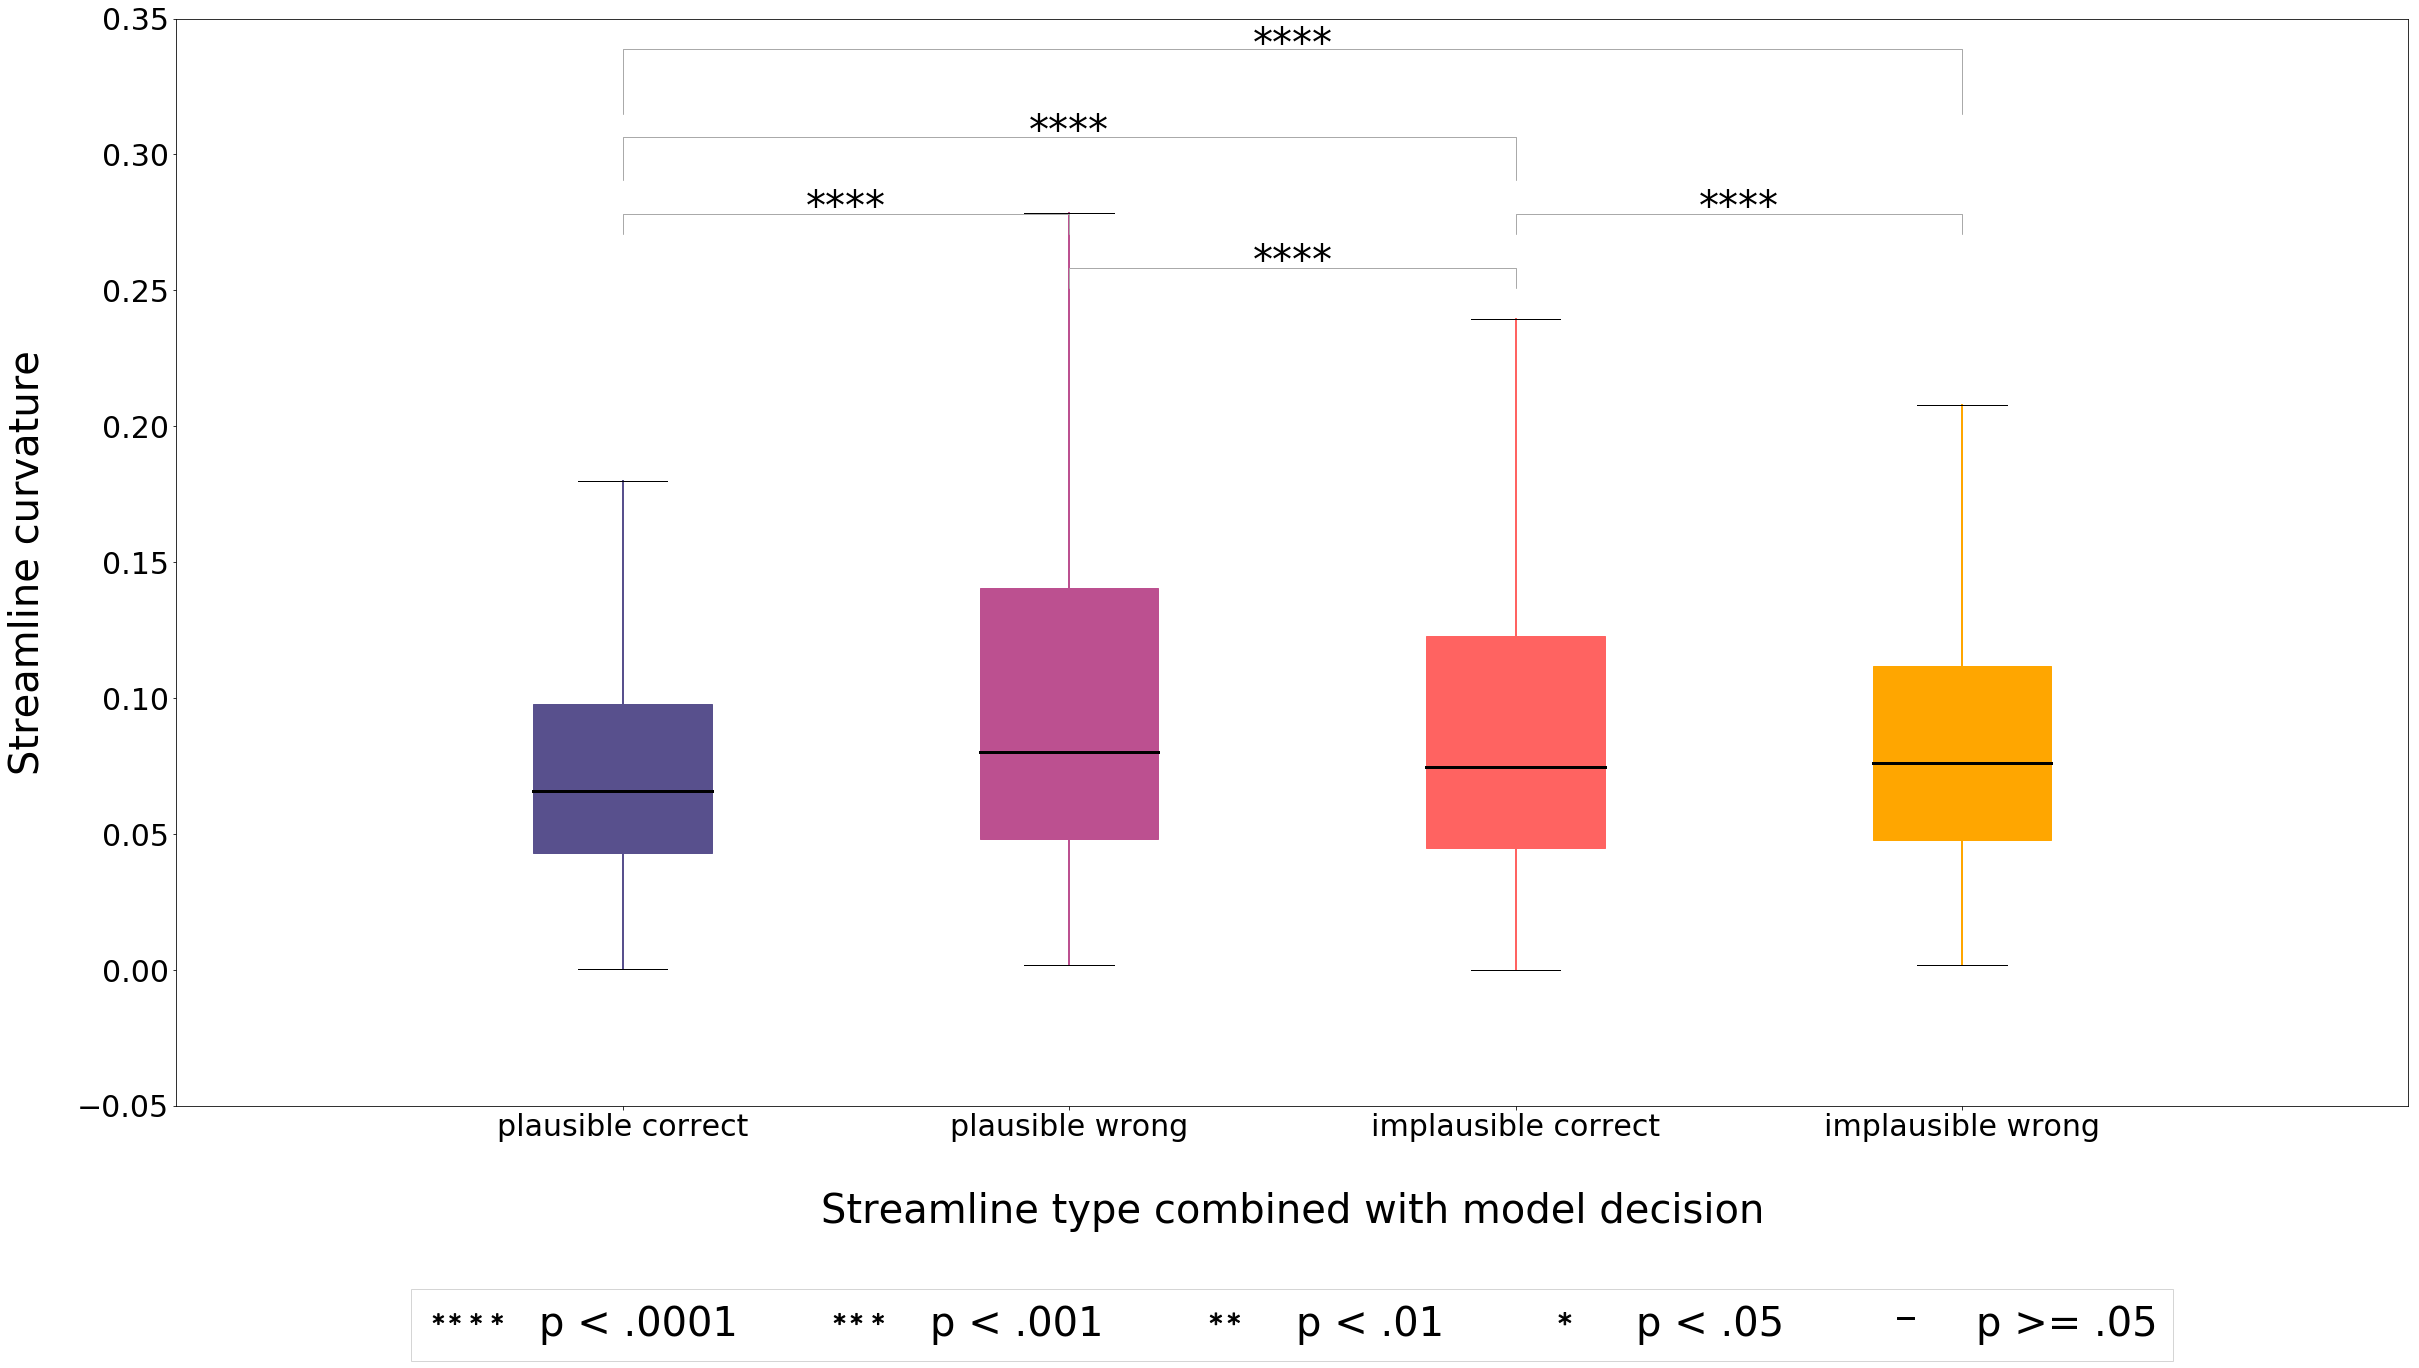

In [197]:
fp_curve = fp_014_curve+fp_115_curve+fp_216_curve+fp_620_curve
fn_curve = fn_014_curve+fn_115_curve+fn_216_curve+fn_620_curve
pl_curve = pl_014_curve+pl_115_curve+pl_216_curve+pl_620_curve
np_curve = np_014_curve+np_115_curve+np_216_curve+np_620_curve

import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
import matplotlib.lines as mlines

ticks = ['plausible correct','plausible incorrect','implausible correct','implausible incorrect']
plt.figure()

fig,ax = plt.subplots(figsize=(40,20))

bp1 = plt.boxplot(pl_curve,positions=[1],widths=.4, patch_artist=True,showfliers=False)
bp2 = plt.boxplot(fn_curve,positions=[2],widths=.4,patch_artist=True,showfliers=False)
bp3 = plt.boxplot(np_curve,positions=[3],widths=.4,patch_artist=True,showfliers=False)
bp4 = plt.boxplot(fp_curve,positions=[4],widths=.4,patch_artist=True,showfliers=False)
bp=[bp1,bp2,bp3,bp4]
colors=['#58508d','#bc5090','#ff6361','#ffa600']
for j in range(0,len(bp)):
    for i in range(0,len(bp1['boxes'])):
        bp[j]['boxes'][i].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_color(colors[j])
        bp[j]['whiskers'][i*2 + 1].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_linewidth(2)
        bp[j]['whiskers'][i*2 + 1].set_linewidth(2)
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        bp[j]['medians'][i].set_color('black')
        bp[j]['medians'][i].set_linewidth(3)
        
ax.annotate("",xy=(1,.29),xycoords='data',
           xytext=(3,.29),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2,.308,stars(p_value1),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(2,.25),xycoords='data',
           xytext=(3,.25),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2.5,.26,stars(p_value2),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(1,.314),xycoords='data',
           xytext=(4,.314),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2.5,.34,stars(p_value3),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(3,.27),xycoords='data',
           xytext=(4,.27),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(3.5,.28,stars(p_value4),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(1,.27),xycoords='data',
           xytext=(2,.27),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(1.5,.28,stars(p_value5),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')



plt.xlim(0,5)
plt.ylim(-.05,.35)
ax.set_ylabel('Streamline curvature',labelpad=30,fontsize=40)
ax.set_xlabel('Streamline type combined with model decision',labelpad=50,fontsize=40)
ax.set_xticks([1,2,3,4])
plt.tick_params(labelsize=30)
ax.set_xticklabels(['plausible correct','plausible wrong', 'implausible correct','implausible wrong'],fontsize=30)
four_stars = mlines.Line2D([],[],color='black',marker="$****$",linestyle='None',markersize=70,label='p < .0001')
three_stars = mlines.Line2D([],[],color='black',marker="$***$",linestyle='None',markersize=50,label='p < .001')
two_stars = mlines.Line2D([],[],color='black',marker="$**$",linestyle='None',markersize=30,label='p < .01')
one_star = mlines.Line2D([],[],color='black',marker="$*$",linestyle='None',markersize=20,label='p < .05')
no_stars = mlines.Line2D([],[],color='black',marker="$-$",linestyle='None',markersize=20,label='p >= .05')
ax.legend(handles=[four_stars,three_stars,two_stars,one_star,no_stars],fontsize=40,loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=False, shadow=False, ncol=5)
#plt.savefig('edgeconv_error_analysis_meanplussign.png')
plt.show()

<Figure size 432x288 with 0 Axes>

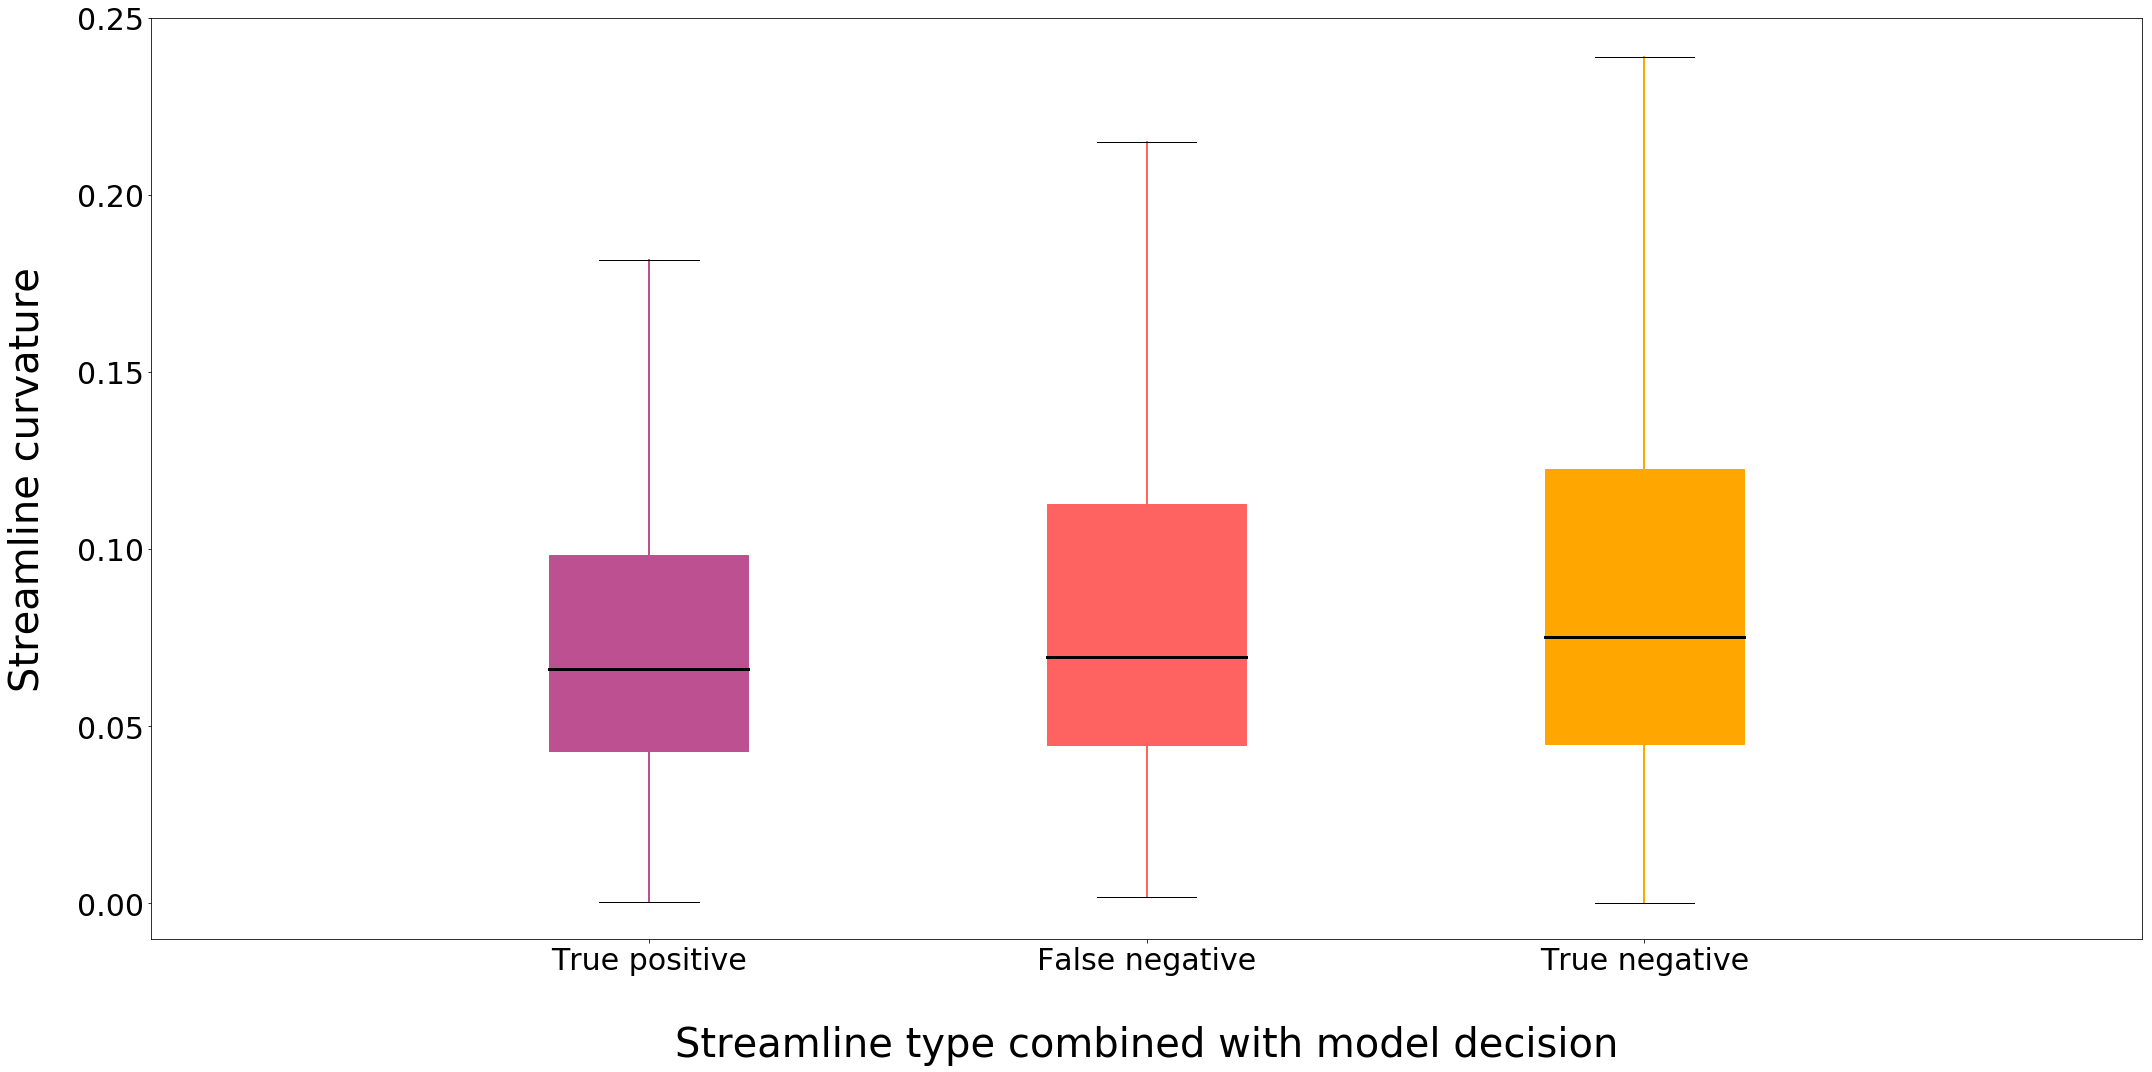

In [143]:
fp_curve = fp_014_curve+fp_115_curve+fp_216_curve+fp_620_curve
fn_curve = fn_014_curve+fn_115_curve+fn_216_curve+fn_620_curve
pl_curve = pl_014_curve+pl_115_curve+pl_216_curve+pl_620_curve
np_curve = np_014_curve+np_115_curve+np_216_curve+np_620_curve

import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
import matplotlib.lines as mlines

ticks = ['true positive','false negative','true negative']
plt.figure()

fig,ax = plt.subplots(figsize=(30,15))

bp1 = plt.boxplot(pl_curve,positions=[1],widths=.4, patch_artist=True,showfliers=False)
bp2 = plt.boxplot(fn_curve,positions=[2],widths=.4,patch_artist=True,showfliers=False)
bp3 = plt.boxplot(np_curve,positions=[3],widths=.4,patch_artist=True,showfliers=False)
#bp4 = plt.boxplot(fp_curve,positions=[4],widths=.4,patch_artist=True,showfliers=False)
bp=[bp1,bp2,bp3]#,bp4]
#colors=['#58508d','#bc5090','#ff6361','#ffa600']
colors=['#bc5090','#ff6361','#ffa600']
for j in range(0,len(bp)):
    for i in range(0,len(bp1['boxes'])):
        bp[j]['boxes'][i].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_color(colors[j])
        bp[j]['whiskers'][i*2 + 1].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_linewidth(2)
        bp[j]['whiskers'][i*2 + 1].set_linewidth(2)
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        bp[j]['medians'][i].set_color('black')
        bp[j]['medians'][i].set_linewidth(3)

plt.xlim(0,4)
plt.ylim(-.01,.25)
ax.set_ylabel('Streamline curvature',labelpad=30,fontsize=40)
ax.set_xlabel('Streamline type combined with model decision',labelpad=50,fontsize=40)
ax.set_xticks([1,2,3])
plt.tick_params(labelsize=30)
ax.set_xticklabels(['True positive','False negative', 'True negative'],fontsize=30)
four_stars = mlines.Line2D([],[],color='black',marker="$****$",linestyle='None',markersize=70,label='p < .0001')
three_stars = mlines.Line2D([],[],color='black',marker="$***$",linestyle='None',markersize=50,label='p < .001')
two_stars = mlines.Line2D([],[],color='black',marker="$**$",linestyle='None',markersize=30,label='p < .01')
one_star = mlines.Line2D([],[],color='black',marker="$*$",linestyle='None',markersize=20,label='p < .05')
no_stars = mlines.Line2D([],[],color='black',marker="$-$",linestyle='None',markersize=20,label='p >= .05')
#ax.legend(handles=[four_stars,three_stars,two_stars,one_star,no_stars],fontsize=40,loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=False, shadow=False, ncol=5)
#plt.savefig('edgeconv_error_analysis_meanplussign.png')
fig.tight_layout()
plt.show()

In [78]:
pl_length_pn = list(pl_014_length_pn)+list(pl_115_length_pn)+list(pl_216_length_pn)+list(pl_620_length_pn)
np_length_pn = list(np_014_length_pn)+list(np_115_length_pn)+list(np_216_length_pn)+list(np_620_length_pn)
fp_length_pn = list(fp_014_length_pn)+list(fp_115_length_pn)+list(fp_216_length_pn)+list(fp_620_length_pn)
fn_length_pn = list(fn_014_length_pn)+list(fn_115_length_pn)+list(fn_216_length_pn)+list(fn_620_length_pn)

In [79]:
pl_length_sdeq = list(pl_014_length_sdeq)+list(pl_115_length_sdeq)+list(pl_216_length_sdeq)+list(pl_620_length_sdeq)
np_length_sdeq = list(np_014_length_sdeq)+list(np_115_length_sdeq)+list(np_216_length_sdeq)+list(np_620_length_sdeq)
fp_length_sdeq = list(fp_014_length_sdeq)+list(fp_115_length_sdeq)+list(fp_216_length_sdeq)+list(fp_620_length_sdeq)
fn_length_sdeq = list(fn_014_length_sdeq)+list(fn_115_length_sdeq)+list(fn_216_length_sdeq)+list(fn_620_length_sdeq)

In [105]:
pl_curve_pn = pl_014_curve_pn+pl_115_curve_pn+pl_216_curve_pn+pl_620_curve_pn
np_curve_pn = np_014_curve_pn+np_115_curve_pn+np_216_curve_pn+np_620_curve_pn
fp_curve_pn = fp_014_curve_pn+fp_115_curve_pn+fp_216_curve_pn+fp_620_curve_pn
fn_curve_pn = fn_014_curve_pn+fn_115_curve_pn+fn_216_curve_pn+fn_620_curve_pn

In [106]:
pl_curve_sdeq = pl_014_curve_sdeq+pl_115_curve_sdeq+pl_216_curve_sdeq+pl_620_curve_sdeq
np_curve_sdeq = np_014_curve_sdeq+np_115_curve_sdeq+np_216_curve_sdeq+np_620_curve_sdeq
fp_curve_sdeq = fp_014_curve_sdeq+fp_115_curve_sdeq+fp_216_curve_sdeq+fp_620_curve_sdeq
fn_curve_sdeq = fn_014_curve_sdeq+fn_115_curve_sdeq+fn_216_curve_sdeq+fn_620_curve_sdeq

In [86]:
pointnet = [np.mean(pl_length_pn),np.mean(fn_length_pn),np.mean(np_length_pn),np.mean(fp_length_pn)]
pn_sd = [np.std(pl_length_pn),np.std(fn_length_pn),np.std(np_length_pn),np.std(fp_length_pn)]

In [107]:
pointnet = [np.mean(pl_curve_pn),np.mean(fn_curve_pn),np.mean(np_curve_pn),np.mean(fp_curve_pn)]
pn_sd = [np.std(pl_curve_pn),np.std(fn_curve_pn),np.std(np_curve_pn),np.std(fp_curve_pn)]

In [87]:
edgeconv = [np.mean(pl_length_sdeq),np.mean(fn_length_sdeq),np.mean(np_length_sdeq),np.mean(fp_length_sdeq)]
sdec_sd = [np.std(pl_length_sdeq),np.std(fn_length_sdeq),np.std(np_length_sdeq),np.std(fp_length_sdeq)]

In [108]:
edgeconv = [np.mean(pl_curve_sdeq),np.mean(fn_curve_sdeq),np.mean(np_curve_sdeq),np.mean(fp_curve_sdeq)]
sdec_sd = [np.std(pl_curve_sdeq),np.std(fn_curve_sdeq),np.std(np_curve_sdeq),np.std(fp_curve_sdeq)]

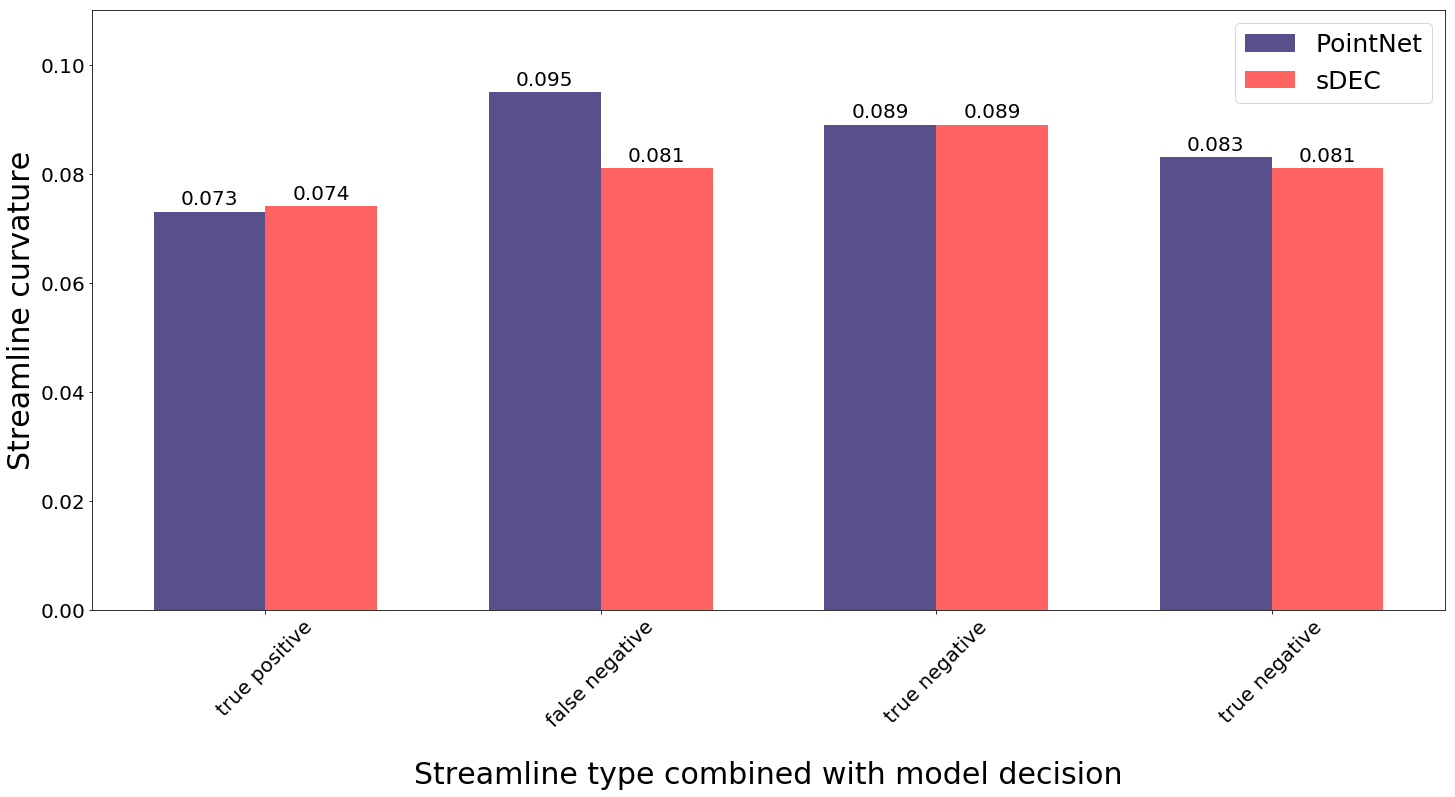

In [115]:
import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
import matplotlib.lines as mlines

rnd_pn = []
rnd_sdec = []
for i in pointnet:
    i=round(i,3)
    rnd_pn.append(i)
for i in edgeconv:
    i=round(i,3)
    rnd_sdec.append(i)
    
labels = ['true positive','false negative','true negative','true negative','false positive']
x = np.arange(len(labels))
width = .2
fig, ax = plt.subplots(figsize=(20,10))

rects1 = ax.bar([.1,.7,1.3,1.9],rnd_pn,width,label='PointNet',color='#58508d')
rects2 = ax.bar([.3,.9,1.5,2.1],rnd_sdec,width,label='sDEC',color='#ff6361')

ax.set_xlabel('Streamline type combined with model decision',fontsize=30,labelpad=30)
ax.set_ylabel('Streamline curvature',fontsize=30)
ax.set_xticks([.2,.8,1.4,2])
ax.set_xticklabels(labels,fontsize=30)
plt.legend(loc='upper right', prop={'size': 25})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,.11)
#plt.savefig('dec_acc.png')
plt.show()

<Figure size 432x288 with 0 Axes>

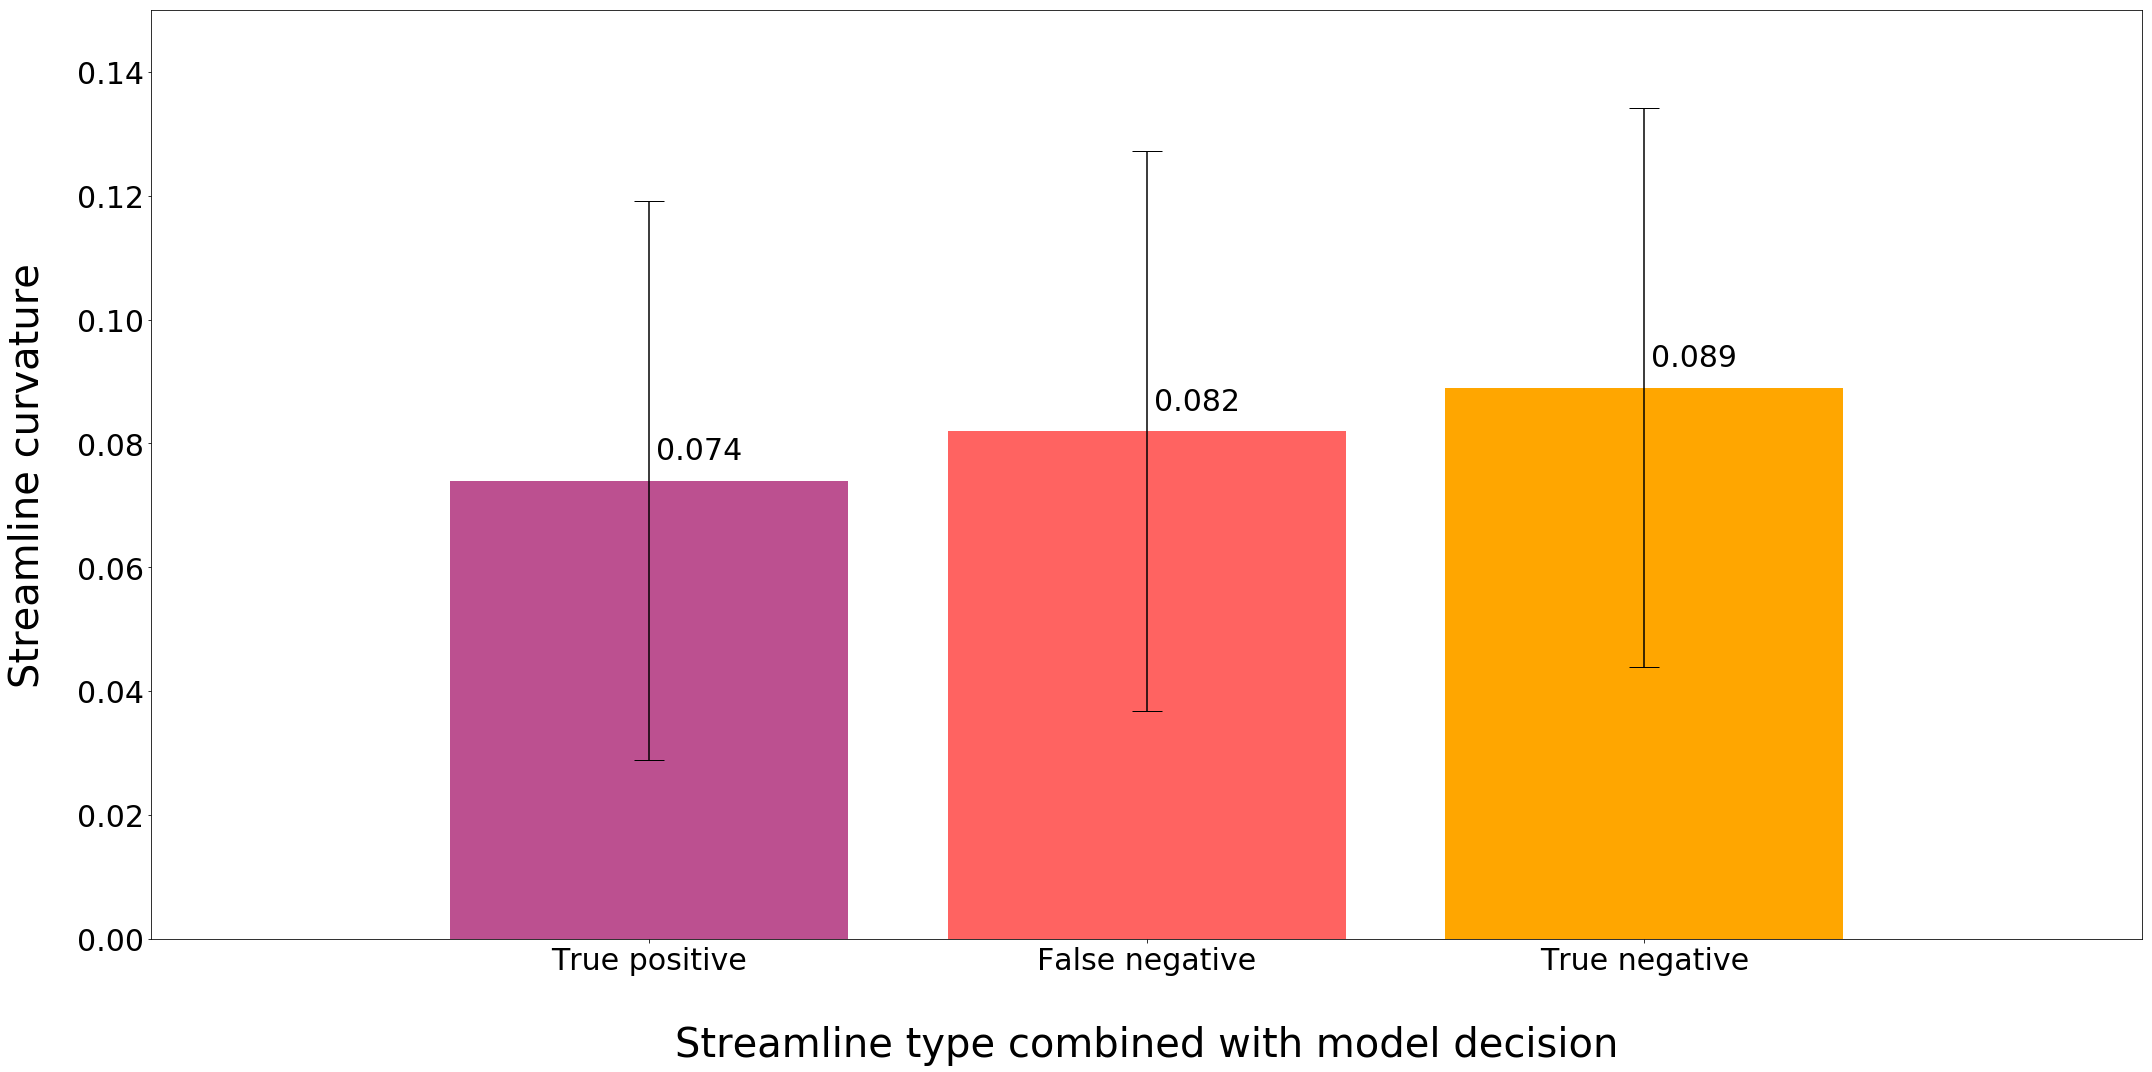

In [152]:
fp_curve = fp_014_curve+fp_115_curve+fp_216_curve+fp_620_curve
fn_curve = fn_014_curve+fn_115_curve+fn_216_curve+fn_620_curve
pl_curve = pl_014_curve+pl_115_curve+pl_216_curve+pl_620_curve
np_curve = np_014_curve+np_115_curve+np_216_curve+np_620_curve

import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
import matplotlib.lines as mlines

ticks = ['true positive','false negative','true negative']
plt.figure()

fig,ax = plt.subplots(figsize=(30,15))

rects1 = ax.bar(1,round(np.mean(pl_curve),3),yerr=np.std(fp_curve),ecolor='black',capsize=15,color='#bc5090')
rects2 = ax.bar(2,round(np.mean(fn_curve),3),yerr=np.std(fp_curve),ecolor='black',capsize=15,color='#ff6361')
rects3 = ax.bar(3,round(np.mean(np_curve),3),yerr=np.std(fp_curve),ecolor='black',capsize=15,color='#ffa600')
#bp4 = plt.boxplot(fp_curve,positions=[4],widths=.4,patch_artist=True,showfliers=False)
bp=[bp1,bp2,bp3]#,bp4]
#colors=['#58508d','#bc5090','#ff6361','#ffa600']
colors=['#bc5090','#ff6361','#ffa600']
        
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(50, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=30)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.xlim(0,4)
plt.ylim(0,.15)
ax.set_ylabel('Streamline curvature',labelpad=30,fontsize=40)
ax.set_xlabel('Streamline type combined with model decision',labelpad=50,fontsize=40)
ax.set_xticks([1,2,3])
plt.tick_params(labelsize=30)
ax.set_xticklabels(['True positive','False negative', 'True negative'],fontsize=30)#,rotation=45)
four_stars = mlines.Line2D([],[],color='black',marker="$****$",linestyle='None',markersize=70,label='p < .0001')
three_stars = mlines.Line2D([],[],color='black',marker="$***$",linestyle='None',markersize=50,label='p < .001')
two_stars = mlines.Line2D([],[],color='black',marker="$**$",linestyle='None',markersize=30,label='p < .01')
one_star = mlines.Line2D([],[],color='black',marker="$*$",linestyle='None',markersize=20,label='p < .05')
no_stars = mlines.Line2D([],[],color='black',marker="$-$",linestyle='None',markersize=20,label='p >= .05')
#ax.legend(handles=[four_stars,three_stars,two_stars,one_star,no_stars],fontsize=40,loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=False, shadow=False, ncol=5)
#plt.savefig('edgeconv_error_analysis_meanplussign.png')
fig.tight_layout()
plt.show()

In [76]:
pl_014_length_pn

array([21.15082428, 50.80940922, 61.84675211, ..., 22.77109726,
       21.42890583, 43.55325782])

<Figure size 432x288 with 0 Axes>

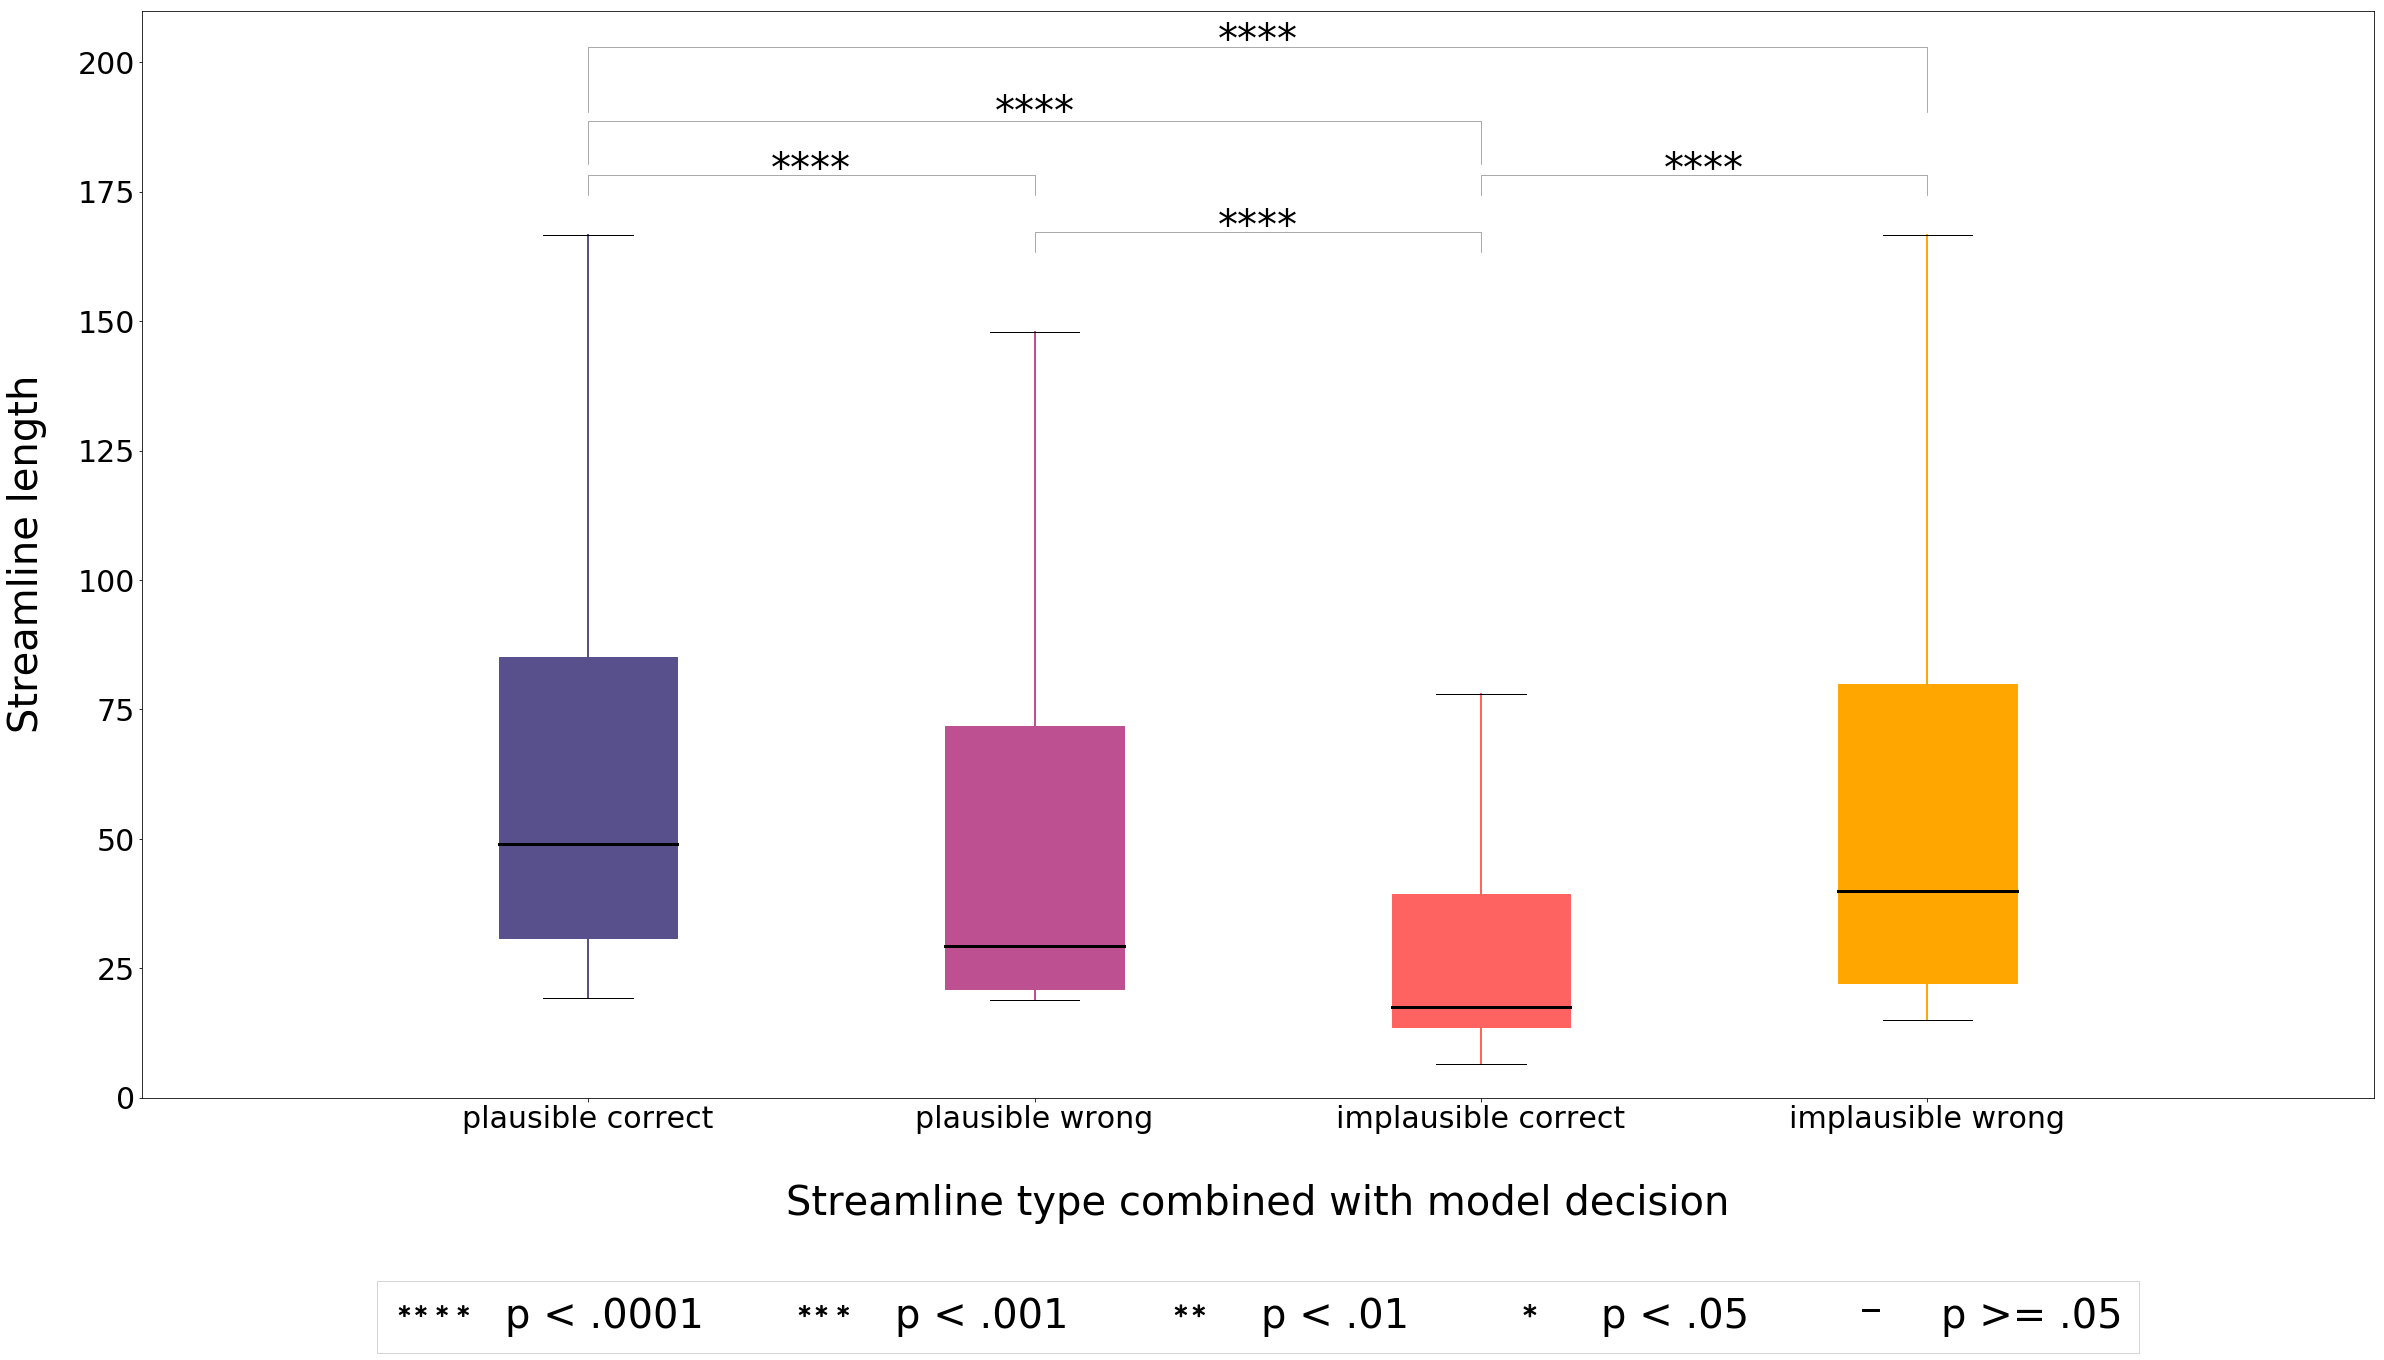

In [226]:
fp_curve = list(fp_014_length)+list(fp_115_length)+list(fp_216_length)+list(fp_620_length)
fn_curve = list(fn_014_length)+list(fn_115_length)+list(fn_216_length)+list(fn_620_length)
pl_curve = list(pl_014_length)+list(pl_115_length)+list(pl_216_length)+list(pl_620_length)
np_curve = list(np_014_length)+list(np_115_length)+list(np_216_length)+list(np_620_length)

import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
import matplotlib.lines as mlines

ticks = ['plausible correct','plausible incorrect','implausible correct','implausible incorrect']
plt.figure()

fig,ax = plt.subplots(figsize=(40,20))

bp1 = plt.boxplot(pl_curve,positions=[1],widths=.4, patch_artist=True,showfliers=False)
bp2 = plt.boxplot(fn_curve,positions=[2],widths=.4,patch_artist=True,showfliers=False)
bp3 = plt.boxplot(np_curve,positions=[3],widths=.4,patch_artist=True,showfliers=False)
bp4 = plt.boxplot(fp_curve,positions=[4],widths=.4,patch_artist=True,showfliers=False)
bp=[bp1,bp2,bp3,bp4]
colors=['#58508d','#bc5090','#ff6361','#ffa600']
for j in range(0,len(bp)):
    for i in range(0,len(bp1['boxes'])):
        bp[j]['boxes'][i].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_color(colors[j])
        bp[j]['whiskers'][i*2 + 1].set_color(colors[j])
        bp[j]['whiskers'][i*2].set_linewidth(2)
        bp[j]['whiskers'][i*2 + 1].set_linewidth(2)
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        #bp[j]['fliers'][i ].set(markerfacecolor=colors[i],
         #               marker='o', alpha=0.75, markersize=6,
          #              markeredgecolor='none')
        bp[j]['medians'][i].set_color('black')
        bp[j]['medians'][i].set_linewidth(3)
        
ax.annotate("",xy=(1,180),xycoords='data',
           xytext=(3,180),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2,190,stars(p_value1),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(2,163),xycoords='data',
           xytext=(3,163),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2.5,168,stars(p_value2),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(1,190),xycoords='data',
           xytext=(4,190),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(2.5,204,stars(p_value3),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(3,174),xycoords='data',
           xytext=(4,174),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(3.5,179,stars(p_value4),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')

ax.annotate("",xy=(1,174),xycoords='data',
           xytext=(2,174),textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.05"))
ax.text(1.5,179,stars(p_value5),fontsize=40,
       horizontalalignment='center',
       verticalalignment='center')



plt.xlim(0,5)
plt.ylim(0,210)
ax.set_ylabel('Streamline length',labelpad=30,fontsize=40)
ax.set_xlabel('Streamline type combined with model decision',labelpad=50,fontsize=40)
ax.set_xticks([1,2,3,4])
plt.tick_params(labelsize=30)
ax.set_xticklabels(['plausible correct','plausible wrong', 'implausible correct','implausible wrong'],fontsize=30)
four_stars = mlines.Line2D([],[],color='black',marker="$****$",linestyle='None',markersize=70,label='p < .0001')
three_stars = mlines.Line2D([],[],color='black',marker="$***$",linestyle='None',markersize=50,label='p < .001')
two_stars = mlines.Line2D([],[],color='black',marker="$**$",linestyle='None',markersize=30,label='p < .01')
one_star = mlines.Line2D([],[],color='black',marker="$*$",linestyle='None',markersize=20,label='p < .05')
no_stars = mlines.Line2D([],[],color='black',marker="$-$",linestyle='None',markersize=20,label='p >= .05')
ax.legend(handles=[four_stars,three_stars,two_stars,one_star,no_stars],fontsize=40,loc='upper center',bbox_to_anchor=(0.5, -0.15),fancybox=False, shadow=False, ncol=5)
#plt.savefig('edgeconv_error_analysis_meanplussign_length.png')
plt.show()

In [222]:
import scipy.stats
#data1 = pl_mean_lengths_dict.values()
#data2 = np_mean_lengths_dict.values()
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "-"
#z,p = scipy.stats.mannwhitneyu(data1, data2)
#p_value = p*2
#s = stars(p)

In [223]:
z1,p1 = scipy.stats.mannwhitneyu(pl_curve,np_curve)
z2,p2 = scipy.stats.mannwhitneyu(fn_curve,np_curve)
z3,p3 = scipy.stats.mannwhitneyu(pl_curve,fp_curve)
z4,p4 = scipy.stats.mannwhitneyu(np_curve,fp_curve)
z5,p5 = scipy.stats.mannwhitneyu(pl_curve,fn_curve)

In [224]:
p_value1 = p1*2
p_value2 = p2*2
p_value3 = p3*2
p_value4 = p4*2
p_value5 = p5*2

In [225]:
stars(p_value1),stars(p_value2),stars(p_value3),stars(p_value4),stars(p_value5)

('****', '****', '****', '****', '****')

# Accuracy distribution

In [148]:
lengths_correct_s014_gcn = []
for i in idxs_s014_correct_gcn:
    lengths_correct_s014_gcn.append(lengths_s014[i])
    
lengths_correct_s115_gcn = []
for i in idxs_s115_correct_gcn:
    lengths_correct_s115_gcn.append(lengths_s115[i])
    
lengths_correct_s216_gcn = []
for i in idxs_s216_correct_gcn:
    lengths_correct_s216_gcn.append(lengths_s216[i])
    
lengths_correct_s620_gcn = []
for i in idxs_s620_correct_gcn:
    lengths_correct_s620_gcn.append(lengths_s620[i])

In [116]:
lengths_correct_s014_sdeq = []
for i in idxs_s014_correct_sdeq:
    lengths_correct_s014_sdeq.append(lengths_s014[i])
    
lengths_correct_s115_sdeq = []
for i in idxs_s115_correct_sdeq:
    lengths_correct_s115_sdeq.append(lengths_s115[i])
    
lengths_correct_s216_sdeq = []
for i in idxs_s216_correct_sdeq:
    lengths_correct_s216_sdeq.append(lengths_s216[i])
    
lengths_correct_s620_sdeq = []
for i in idxs_s620_correct_sdeq:
    lengths_correct_s620_sdeq.append(lengths_s620[i])

In [150]:
lengths_correct_s014_blstm = []
for i in idxs_s014_correct_blstm:
    lengths_correct_s014_blstm.append(lengths_s014[i])
    
lengths_correct_s115_blstm = []
for i in idxs_s115_correct_blstm:
    lengths_correct_s115_blstm.append(lengths_s115[i])
    
lengths_correct_s216_blstm = []
for i in idxs_s216_correct_blstm:
    lengths_correct_s216_blstm.append(lengths_s216[i])
    
lengths_correct_s620_blstm = []
for i in idxs_s620_correct_blstm:
    lengths_correct_s620_blstm.append(lengths_s620[i])

In [151]:
lengths_correct_s014_dec = []
for i in idxs_s014_correct_dec:
    lengths_correct_s014_dec.append(lengths_s014[i])
    
lengths_correct_s115_dec = []
for i in idxs_s115_correct_dec:
    lengths_correct_s115_dec.append(lengths_s115[i])
    
lengths_correct_s216_dec = []
for i in idxs_s216_correct_dec:
    lengths_correct_s216_dec.append(lengths_s216[i])
    
lengths_correct_s620_dec = []
for i in idxs_s620_correct_dec:
    lengths_correct_s620_dec.append(lengths_s620[i])

In [117]:
lengths_correct_s014_pn = []
for i in idxs_s014_correct_pn:
    lengths_correct_s014_pn.append(lengths_s014[i])
    
lengths_correct_s115_pn = []
for i in idxs_s115_correct_pn:
    lengths_correct_s115_pn.append(lengths_s115[i])
    
lengths_correct_s216_pn = []
for i in idxs_s216_correct_pn:
    lengths_correct_s216_pn.append(lengths_s216[i])
    
lengths_correct_s620_pn = []
for i in idxs_s620_correct_pn:
    lengths_correct_s620_pn.append(lengths_s620[i])

In [42]:
curve_correct_s014_gcn = []
for i in idxs_s014_correct_gcn:
    curve_correct_s014_gcn.append(curve_014[i])
    
curve_correct_s115_gcn = []
for i in idxs_s115_correct_gcn:
    curve_correct_s115_gcn.append(curve_115[i])
    
curve_correct_s216_gcn = []
for i in idxs_s216_correct_gcn:
    curve_correct_s216_gcn.append(curve_216[i])
    
curve_correct_s620_gcn = []
for i in idxs_s620_correct_gcn:
    curve_correct_s620_gcn.append(curve_620[i])

In [143]:
curve_correct_s014_sdeq = []
for i in idxs_s014_correct_sdeq:
    curve_correct_s014_sdeq.append(curve_014[i])
    
curve_correct_s115_sdeq = []
for i in idxs_s115_correct_sdeq:
    curve_correct_s115_sdeq.append(curve_115[i])
    
curve_correct_s216_sdeq = []
for i in idxs_s216_correct_sdeq:
    curve_correct_s216_sdeq.append(curve_216[i])
    
curve_correct_s620_sdeq = []
for i in idxs_s620_correct_sdeq:
    curve_correct_s620_sdeq.append(curve_620[i])

In [44]:
curve_correct_s014_blstm = []
for i in idxs_s014_correct_blstm:
    curve_correct_s014_blstm.append(curve_014[i])
    
curve_correct_s115_blstm = []
for i in idxs_s115_correct_blstm:
    curve_correct_s115_blstm.append(curve_115[i])
    
curve_correct_s216_blstm = []
for i in idxs_s216_correct_blstm:
    curve_correct_s216_blstm.append(curve_216[i])
    
curve_correct_s620_blstm = []
for i in idxs_s620_correct_blstm:
    curve_correct_s620_blstm.append(curve_620[i])

In [45]:
curve_correct_s014_dec = []
for i in idxs_s014_correct_dec:
    curve_correct_s014_dec.append(curve_014[i])
    
curve_correct_s115_dec = []
for i in idxs_s115_correct_dec:
    curve_correct_s115_dec.append(curve_115[i])
    
curve_correct_s216_dec = []
for i in idxs_s216_correct_dec:
    curve_correct_s216_dec.append(curve_216[i])
    
curve_correct_s620_dec = []
for i in idxs_s620_correct_dec:
    curve_correct_s620_dec.append(curve_620[i])

In [144]:
curve_correct_s014_pn = []
for i in idxs_s014_correct_pn:
    curve_correct_s014_pn.append(curve_014[i])
    
curve_correct_s115_pn = []
for i in idxs_s115_correct_pn:
    curve_correct_s115_pn.append(curve_115[i])
    
curve_correct_s216_pn = []
for i in idxs_s216_correct_pn:
    curve_correct_s216_pn.append(curve_216[i])
    
curve_correct_s620_pn = []
for i in idxs_s620_correct_pn:
    curve_correct_s620_pn.append(curve_620[i])

In [153]:
from collections import Counter
binned_lengths_correct_s014_gcn = []
for value in lengths_correct_s014_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s014_gcn.append(bin_index)
    
frequencies_correct_s014_gcn = Counter(binned_lengths_correct_s014_gcn)

binned_lengths_correct_s115_gcn = []
for value in lengths_correct_s115_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s115_gcn.append(bin_index)
    
frequencies_correct_s115_gcn = Counter(binned_lengths_correct_s115_gcn)

binned_lengths_correct_s216_gcn = []
for value in lengths_correct_s216_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s216_gcn.append(bin_index)
    
frequencies_correct_s216_gcn = Counter(binned_lengths_correct_s216_gcn)

binned_lengths_correct_s620_gcn = []
for value in lengths_correct_s620_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s620_gcn.append(bin_index)
    
frequencies_correct_s620_gcn = Counter(binned_lengths_correct_s620_gcn)

In [47]:
from collections import Counter
binned_curve_correct_s014_gcn = []
for value in curve_correct_s014_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s014_gcn.append(bin_index)
    
frequencies_correct_s014_gcn = Counter(binned_curve_correct_s014_gcn)

binned_curve_correct_s115_gcn = []
for value in curve_correct_s115_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s115_gcn.append(bin_index)
    
frequencies_correct_s115_gcn = Counter(binned_curve_correct_s115_gcn)

binned_curve_correct_s216_gcn = []
for value in curve_correct_s216_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s216_gcn.append(bin_index)
    
frequencies_correct_s216_gcn = Counter(binned_curve_correct_s216_gcn)

binned_curve_correct_s620_gcn = []
for value in curve_correct_s620_gcn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s620_gcn.append(bin_index)
    
frequencies_correct_s620_gcn = Counter(binned_curve_correct_s620_gcn)

In [120]:
from collections import Counter
binned_lengths_correct_s014_sdeq = []
for value in lengths_correct_s014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s014_sdeq.append(bin_index)
    
frequencies_correct_s014_sdeq = Counter(binned_lengths_correct_s014_sdeq)

binned_lengths_correct_s115_sdeq = []
for value in lengths_correct_s115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s115_sdeq.append(bin_index)
    
frequencies_correct_s115_sdeq = Counter(binned_lengths_correct_s115_sdeq)

binned_lengths_correct_s216_sdeq = []
for value in lengths_correct_s216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s216_sdeq.append(bin_index)
    
frequencies_correct_s216_sdeq = Counter(binned_lengths_correct_s216_sdeq)

binned_lengths_correct_s620_sdeq = []
for value in lengths_correct_s620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s620_sdeq.append(bin_index)
    
frequencies_correct_s620_sdeq = Counter(binned_lengths_correct_s620_sdeq)

In [145]:
from collections import Counter
binned_curve_correct_s014_sdeq = []
for value in curve_correct_s014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s014_sdeq.append(bin_index)
    
frequencies_correct_s014_sdeq = Counter(binned_curve_correct_s014_sdeq)

binned_curve_correct_s115_sdeq = []
for value in curve_correct_s115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s115_sdeq.append(bin_index)
    
frequencies_correct_s115_sdeq = Counter(binned_curve_correct_s115_sdeq)

binned_curve_correct_s216_sdeq = []
for value in curve_correct_s216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s216_sdeq.append(bin_index)
    
frequencies_correct_s216_sdeq = Counter(binned_curve_correct_s216_sdeq)

binned_curve_correct_s620_sdeq = []
for value in curve_correct_s620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s620_sdeq.append(bin_index)
    
frequencies_correct_s620_sdeq = Counter(binned_curve_correct_s620_sdeq)

In [155]:
from collections import Counter
binned_lengths_correct_s014_blstm = []
for value in lengths_correct_s014_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s014_blstm.append(bin_index)
    
frequencies_correct_s014_blstm = Counter(binned_lengths_correct_s014_blstm)

binned_lengths_correct_s115_blstm = []
for value in lengths_correct_s115_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s115_blstm.append(bin_index)
    
frequencies_correct_s115_blstm = Counter(binned_lengths_correct_s115_blstm)

binned_lengths_correct_s216_blstm = []
for value in lengths_correct_s216_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s216_blstm.append(bin_index)
    
frequencies_correct_s216_blstm = Counter(binned_lengths_correct_s216_blstm)

binned_lengths_correct_s620_blstm = []
for value in lengths_correct_s620_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s620_blstm.append(bin_index)
    
frequencies_correct_s620_blstm = Counter(binned_lengths_correct_s620_blstm)

In [50]:
from collections import Counter
binned_curve_correct_s014_blstm = []
for value in curve_correct_s014_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s014_blstm.append(bin_index)
    
frequencies_correct_s014_blstm = Counter(binned_curve_correct_s014_blstm)

binned_curve_correct_s115_blstm = []
for value in curve_correct_s115_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s115_blstm.append(bin_index)
    
frequencies_correct_s115_blstm = Counter(binned_curve_correct_s115_blstm)

binned_curve_correct_s216_blstm = []
for value in curve_correct_s216_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s216_blstm.append(bin_index)
    
frequencies_correct_s216_blstm = Counter(binned_curve_correct_s216_blstm)

binned_curve_correct_s620_blstm = []
for value in curve_correct_s620_blstm:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s620_blstm.append(bin_index)
    
frequencies_correct_s620_blstm = Counter(binned_curve_correct_s620_blstm)

In [156]:
from collections import Counter
binned_lengths_correct_s014_dec = []
for value in lengths_correct_s014_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s014_dec.append(bin_index)
    
frequencies_correct_s014_dec = Counter(binned_lengths_correct_s014_dec)

binned_lengths_correct_s115_dec = []
for value in lengths_correct_s115_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s115_dec.append(bin_index)
    
frequencies_correct_s115_dec = Counter(binned_lengths_correct_s115_dec)

binned_lengths_correct_s216_dec = []
for value in lengths_correct_s216_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s216_dec.append(bin_index)
    
frequencies_correct_s216_dec = Counter(binned_lengths_correct_s216_dec)

binned_lengths_correct_s620_dec = []
for value in lengths_correct_s620_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s620_dec.append(bin_index)
    
frequencies_correct_s620_dec = Counter(binned_lengths_correct_s620_dec)

In [51]:
from collections import Counter
binned_curve_correct_s014_dec = []
for value in curve_correct_s014_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s014_dec.append(bin_index)
    
frequencies_correct_s014_dec = Counter(binned_curve_correct_s014_dec)

binned_curve_correct_s115_dec = []
for value in curve_correct_s115_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s115_dec.append(bin_index)
    
frequencies_correct_s115_dec = Counter(binned_curve_correct_s115_dec)

binned_curve_correct_s216_dec = []
for value in curve_correct_s216_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s216_dec.append(bin_index)
    
frequencies_correct_s216_dec = Counter(binned_curve_correct_s216_dec)

binned_curve_correct_s620_dec = []
for value in curve_correct_s620_dec:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s620_dec.append(bin_index)
    
frequencies_correct_s620_dec = Counter(binned_curve_correct_s620_dec)

In [122]:
from collections import Counter
binned_lengths_correct_s014_pn = []
for value in lengths_correct_s014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s014_pn.append(bin_index)
    
frequencies_correct_s014_pn = Counter(binned_lengths_correct_s014_pn)

binned_lengths_correct_s115_pn = []
for value in lengths_correct_s115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s115_pn.append(bin_index)
    
frequencies_correct_s115_pn = Counter(binned_lengths_correct_s115_pn)

binned_lengths_correct_s216_pn = []
for value in lengths_correct_s216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s216_pn.append(bin_index)
    
frequencies_correct_s216_pn = Counter(binned_lengths_correct_s216_pn)

binned_lengths_correct_s620_pn = []
for value in lengths_correct_s620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_lengths_correct_s620_pn.append(bin_index)
    
frequencies_correct_s620_pn = Counter(binned_lengths_correct_s620_pn)

In [146]:
from collections import Counter
binned_curve_correct_s014_pn = []
for value in curve_correct_s014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s014_pn.append(bin_index)
    
frequencies_correct_s014_pn = Counter(binned_curve_correct_s014_pn)

binned_curve_correct_s115_pn = []
for value in curve_correct_s115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s115_pn.append(bin_index)
    
frequencies_correct_s115_pn = Counter(binned_curve_correct_s115_pn)

binned_curve_correct_s216_pn = []
for value in curve_correct_s216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s216_pn.append(bin_index)
    
frequencies_correct_s216_pn = Counter(binned_curve_correct_s216_pn)

binned_curve_correct_s620_pn = []
for value in curve_correct_s620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_curve_correct_s620_pn.append(bin_index)
    
frequencies_correct_s620_pn = Counter(binned_curve_correct_s620_pn)

In [148]:
#frequencies_correct_s014_gcn[2]+=frequencies_correct_s014_gcn[-1]
#frequencies_correct_s115_gcn[2]+=frequencies_correct_s115_gcn[-1]
#frequencies_correct_s216_gcn[2]+=frequencies_correct_s216_gcn[-1]
#frequencies_correct_s620_gcn[2]+=frequencies_correct_s620_gcn[-1]

frequencies_correct_s014_sdeq[2]+=frequencies_correct_s014_sdeq[-1]
frequencies_correct_s115_sdeq[2]+=frequencies_correct_s115_sdeq[-1]
frequencies_correct_s216_sdeq[2]+=frequencies_correct_s216_sdeq[-1]
frequencies_correct_s620_sdeq[2]+=frequencies_correct_s620_sdeq[-1]

#frequencies_correct_s014_blstm[2]+=frequencies_correct_s014_blstm[-1]
#frequencies_correct_s115_blstm[2]+=frequencies_correct_s115_blstm[-1]
#frequencies_correct_s216_blstm[2]+=frequencies_correct_s216_blstm[-1]
#frequencies_correct_s620_blstm[2]+=frequencies_correct_s620_blstm[-1]

#frequencies_correct_s014_dec[2]+=frequencies_correct_s014_dec[-1]
#frequencies_correct_s115_dec[2]+=frequencies_correct_s115_dec[-1]
#frequencies_correct_s216_dec[2]+=frequencies_correct_s216_dec[-1]
#frequencies_correct_s620_dec[2]+=frequencies_correct_s620_dec[-1]

frequencies_correct_s014_pn[2]+=frequencies_correct_s014_pn[-1]
frequencies_correct_s115_pn[2]+=frequencies_correct_s115_pn[-1]
frequencies_correct_s216_pn[2]+=frequencies_correct_s216_pn[-1]
frequencies_correct_s620_pn[2]+=frequencies_correct_s620_pn[-1]

In [149]:
#del frequencies_correct_s014_gcn[-1]
#del frequencies_correct_s115_gcn[-1]
#del frequencies_correct_s216_gcn[-1]
#del frequencies_correct_s620_gcn[-1]

del frequencies_correct_s014_sdeq[-1]
del frequencies_correct_s115_sdeq[-1]
del frequencies_correct_s216_sdeq[-1]
del frequencies_correct_s620_sdeq[-1]

#del frequencies_correct_s014_blstm[-1]
#del frequencies_correct_s115_blstm[-1]
#del frequencies_correct_s216_blstm[-1]
#del frequencies_correct_s620_blstm[-1]

#del frequencies_correct_s014_dec[-1]
#del frequencies_correct_s115_dec[-1]
#del frequencies_correct_s216_dec[-1]
#del frequencies_correct_s620_dec[-1]

del frequencies_correct_s014_pn[-1]
del frequencies_correct_s115_pn[-1]
del frequencies_correct_s216_pn[-1]
del frequencies_correct_s620_pn[-1]

In [159]:
acc_binned_s014_gcn = {}
for i in frequencies_correct_s014_gcn.keys():
    acc_binned_s014_gcn[i]=(frequencies_correct_s014_gcn[i]/frequencies_tot_s014[i])*100.0
    
acc_binned_s115_gcn = {}
for i in frequencies_correct_s115_gcn.keys():
    acc_binned_s115_gcn[i]=(frequencies_correct_s115_gcn[i]/frequencies_tot_s115[i])*100.0
    
acc_binned_s216_gcn = {}
for i in frequencies_correct_s216_gcn.keys():
    acc_binned_s216_gcn[i]=(frequencies_correct_s216_gcn[i]/frequencies_tot_s216[i])*100.0
    
acc_binned_s620_gcn = {}
for i in frequencies_correct_s620_gcn.keys():
    acc_binned_s620_gcn[i]=(frequencies_correct_s620_gcn[i]/frequencies_tot_s620[i])*100.0

In [150]:
acc_binned_s014_sdeq = {}
for i in frequencies_correct_s014_sdeq.keys():
    acc_binned_s014_sdeq[i]=(frequencies_correct_s014_sdeq[i]/frequencies_tot_s014[i])*100.0
    
acc_binned_s115_sdeq = {}
for i in frequencies_correct_s115_sdeq.keys():
    acc_binned_s115_sdeq[i]=(frequencies_correct_s115_sdeq[i]/frequencies_tot_s115[i])*100.0
    
acc_binned_s216_sdeq = {}
for i in frequencies_correct_s216_sdeq.keys():
    acc_binned_s216_sdeq[i]=(frequencies_correct_s216_sdeq[i]/frequencies_tot_s216[i])*100.0
    
acc_binned_s620_sdeq = {}
for i in frequencies_correct_s620_sdeq.keys():
    acc_binned_s620_sdeq[i]=(frequencies_correct_s620_sdeq[i]/frequencies_tot_s620[i])*100.0

In [161]:
acc_binned_s014_blstm = {}
for i in frequencies_correct_s014_blstm.keys():
    acc_binned_s014_blstm[i]=(frequencies_correct_s014_blstm[i]/frequencies_tot_s014[i])*100.0
    
acc_binned_s115_blstm = {}
for i in frequencies_correct_s115_blstm.keys():
    acc_binned_s115_blstm[i]=(frequencies_correct_s115_blstm[i]/frequencies_tot_s115[i])*100.0
    
acc_binned_s216_blstm = {}
for i in frequencies_correct_s216_blstm.keys():
    acc_binned_s216_blstm[i]=(frequencies_correct_s216_blstm[i]/frequencies_tot_s216[i])*100.0
    
acc_binned_s620_blstm = {}
for i in frequencies_correct_s620_blstm.keys():
    acc_binned_s620_blstm[i]=(frequencies_correct_s620_blstm[i]/frequencies_tot_s620[i])*100.0

In [162]:
acc_binned_s014_dec = {}
for i in frequencies_correct_s014_dec.keys():
    acc_binned_s014_dec[i]=(frequencies_correct_s014_dec[i]/frequencies_tot_s014[i])*100.0
    
acc_binned_s115_dec = {}
for i in frequencies_correct_s115_dec.keys():
    acc_binned_s115_dec[i]=(frequencies_correct_s115_dec[i]/frequencies_tot_s115[i])*100.0
    
acc_binned_s216_dec = {}
for i in frequencies_correct_s216_dec.keys():
    acc_binned_s216_dec[i]=(frequencies_correct_s216_dec[i]/frequencies_tot_s216[i])*100.0
    
acc_binned_s620_dec = {}
for i in frequencies_correct_s620_dec.keys():
    acc_binned_s620_dec[i]=(frequencies_correct_s620_dec[i]/frequencies_tot_s620[i])*100.0

In [151]:
acc_binned_s014_pn = {}
for i in frequencies_correct_s014_pn.keys():
    acc_binned_s014_pn[i]=(frequencies_correct_s014_pn[i]/frequencies_tot_s014[i])*100.0
    
acc_binned_s115_pn = {}
for i in frequencies_correct_s115_pn.keys():
    acc_binned_s115_pn[i]=(frequencies_correct_s115_pn[i]/frequencies_tot_s115[i])*100.0
    
acc_binned_s216_pn = {}
for i in frequencies_correct_s216_pn.keys():
    acc_binned_s216_pn[i]=(frequencies_correct_s216_pn[i]/frequencies_tot_s216[i])*100.0
    
acc_binned_s620_pn = {}
for i in frequencies_correct_s620_pn.keys():
    acc_binned_s620_pn[i]=(frequencies_correct_s620_pn[i]/frequencies_tot_s620[i])*100.0

In [152]:
#acc_binned_gcn = {0:np.mean([acc_binned_s014_gcn[0],acc_binned_s115_gcn[0],
#                           acc_binned_s216_gcn[0],acc_binned_s620_gcn[0]]),
#                  1:np.mean([acc_binned_s014_gcn[1],acc_binned_s115_gcn[1],
#                           acc_binned_s216_gcn[1],acc_binned_s620_gcn[1]]),
#                  2:np.mean([acc_binned_s014_gcn[2],acc_binned_s115_gcn[2],
#                           acc_binned_s216_gcn[2],acc_binned_s620_gcn[2]])}
                  #3:np.mean([acc_binned_s014_gcn[3],acc_binned_s115_gcn[3],
                  #         acc_binned_s216_gcn[3],acc_binned_s620_gcn[3]])}

acc_binned_sdeq = {0:np.mean([acc_binned_s014_sdeq[0],acc_binned_s115_sdeq[0],
                           acc_binned_s216_sdeq[0],acc_binned_s620_sdeq[0]]),
                  1:np.mean([acc_binned_s014_sdeq[1],acc_binned_s115_sdeq[1],
                           acc_binned_s216_sdeq[1],acc_binned_s620_sdeq[1]]),
                  2:np.mean([acc_binned_s014_sdeq[2],acc_binned_s115_sdeq[2],
                           acc_binned_s216_sdeq[2],acc_binned_s620_sdeq[2]])}
                  #3:np.mean([acc_binned_s014_sdeq[3],acc_binned_s115_sdeq[3],
                  #         acc_binned_s216_sdeq[3],acc_binned_s620_sdeq[3]])}

#acc_binned_blstm = {0:np.mean([acc_binned_s014_blstm[0],acc_binned_s115_blstm[0],
#                           acc_binned_s216_blstm[0],acc_binned_s620_blstm[0]]),
#                  1:np.mean([acc_binned_s014_blstm[1],acc_binned_s115_blstm[1],
#                           acc_binned_s216_blstm[1],acc_binned_s620_blstm[1]]),
#                  2:np.mean([acc_binned_s014_blstm[2],acc_binned_s115_blstm[2],
#                           acc_binned_s216_blstm[2],acc_binned_s620_blstm[2]])}
                  #3:np.mean([acc_binned_s014_blstm[3],acc_binned_s115_blstm[3],
                  #         acc_binned_s216_blstm[3],acc_binned_s620_blstm[3]])}

#acc_binned_dec = {0:np.mean([acc_binned_s014_dec[0],acc_binned_s115_dec[0],
#                           acc_binned_s216_dec[0],acc_binned_s620_dec[0]]),
#                  1:np.mean([acc_binned_s014_dec[1],acc_binned_s115_dec[1],
#                           acc_binned_s216_dec[1],acc_binned_s620_dec[1]]),
#                  2:np.mean([acc_binned_s014_dec[2],acc_binned_s115_dec[2],
#                           acc_binned_s216_dec[2],acc_binned_s620_dec[2]])}
                  #3:np.mean([acc_binned_s014_dec[3],acc_binned_s115_dec[3],
                  #         acc_binned_s216_dec[3],acc_binned_s620_dec[3]])}

acc_binned_pn = {0:np.mean([acc_binned_s014_pn[0],acc_binned_s115_pn[0],
                           acc_binned_s216_pn[0],acc_binned_s620_pn[0]]),
                  1:np.mean([acc_binned_s014_pn[1],acc_binned_s115_pn[1],
                           acc_binned_s216_pn[1],acc_binned_s620_pn[1]]),
                  2:np.mean([acc_binned_s014_pn[2],acc_binned_s115_pn[2],
                           acc_binned_s216_pn[2],acc_binned_s620_pn[2]])}
                  #3:np.mean([acc_binned_s014_pn[3],acc_binned_s115_pn[3],
                  #         acc_binned_s216_pn[3],acc_binned_s620_pn[3]])}

In [153]:
#acc_binned_gcn_sd = {0:np.std([acc_binned_s014_gcn[0],acc_binned_s115_gcn[0],
#                           acc_binned_s216_gcn[0],acc_binned_s620_gcn[0]]),
#                  1:np.std([acc_binned_s014_gcn[1],acc_binned_s115_gcn[1],
#                           acc_binned_s216_gcn[1],acc_binned_s620_gcn[1]]),
#                  2:np.std([acc_binned_s014_gcn[2],acc_binned_s115_gcn[2],
#                           acc_binned_s216_gcn[2],acc_binned_s620_gcn[2]])}
                  #3:np.std([acc_binned_s014_gcn[3],acc_binned_s115_gcn[3],
                  #         acc_binned_s216_gcn[3],acc_binned_s620_gcn[3]])}

acc_binned_sdeq_sd = {0:np.std([acc_binned_s014_sdeq[0],acc_binned_s115_sdeq[0],
                           acc_binned_s216_sdeq[0],acc_binned_s620_sdeq[0]]),
                  1:np.std([acc_binned_s014_sdeq[1],acc_binned_s115_sdeq[1],
                           acc_binned_s216_sdeq[1],acc_binned_s620_sdeq[1]]),
                  2:np.std([acc_binned_s014_sdeq[2],acc_binned_s115_sdeq[2],
                           acc_binned_s216_sdeq[2],acc_binned_s620_sdeq[2]])}
                  #3:np.std([acc_binned_s014_sdeq[3],acc_binned_s115_sdeq[3],
                  #         acc_binned_s216_sdeq[3],acc_binned_s620_sdeq[3]])}

#acc_binned_blstm_sd = {0:np.std([acc_binned_s014_blstm[0],acc_binned_s115_blstm[0],
#                           acc_binned_s216_blstm[0],acc_binned_s620_blstm[0]]),
#                  1:np.std([acc_binned_s014_blstm[1],acc_binned_s115_blstm[1],
#                           acc_binned_s216_blstm[1],acc_binned_s620_blstm[1]]),
#                  2:np.std([acc_binned_s014_blstm[2],acc_binned_s115_blstm[2],
#                           acc_binned_s216_blstm[2],acc_binned_s620_blstm[2]])}
                  #3:np.std([acc_binned_s014_blstm[3],acc_binned_s115_blstm[3],
                  #         acc_binned_s216_blstm[3],acc_binned_s620_blstm[3]])}

#acc_binned_dec_sd = {0:np.std([acc_binned_s014_dec[0],acc_binned_s115_dec[0],
#                           acc_binned_s216_dec[0],acc_binned_s620_dec[0]]),
#                  1:np.std([acc_binned_s014_dec[1],acc_binned_s115_dec[1],
#                           acc_binned_s216_dec[1],acc_binned_s620_dec[1]]),
#                  2:np.std([acc_binned_s014_dec[2],acc_binned_s115_dec[2],
#                           acc_binned_s216_dec[2],acc_binned_s620_dec[2]])}
                  #3:np.std([acc_binned_s014_dec[3],acc_binned_s115_dec[3],
                  #         acc_binned_s216_dec[3],acc_binned_s620_dec[3]])}

acc_binned_pn_sd = {0:np.std([acc_binned_s014_pn[0],acc_binned_s115_pn[0],
                           acc_binned_s216_pn[0],acc_binned_s620_pn[0]]),
                  1:np.std([acc_binned_s014_pn[1],acc_binned_s115_pn[1],
                           acc_binned_s216_pn[1],acc_binned_s620_pn[1]]),
                  2:np.std([acc_binned_s014_pn[2],acc_binned_s115_pn[2],
                           acc_binned_s216_pn[2],acc_binned_s620_pn[2]])}
                  #3:np.std([acc_binned_s014_pn[3],acc_binned_s115_pn[3],
                  #         acc_binned_s216_pn[3],acc_binned_s620_pn[3]])}

# Plots accuracy distribution

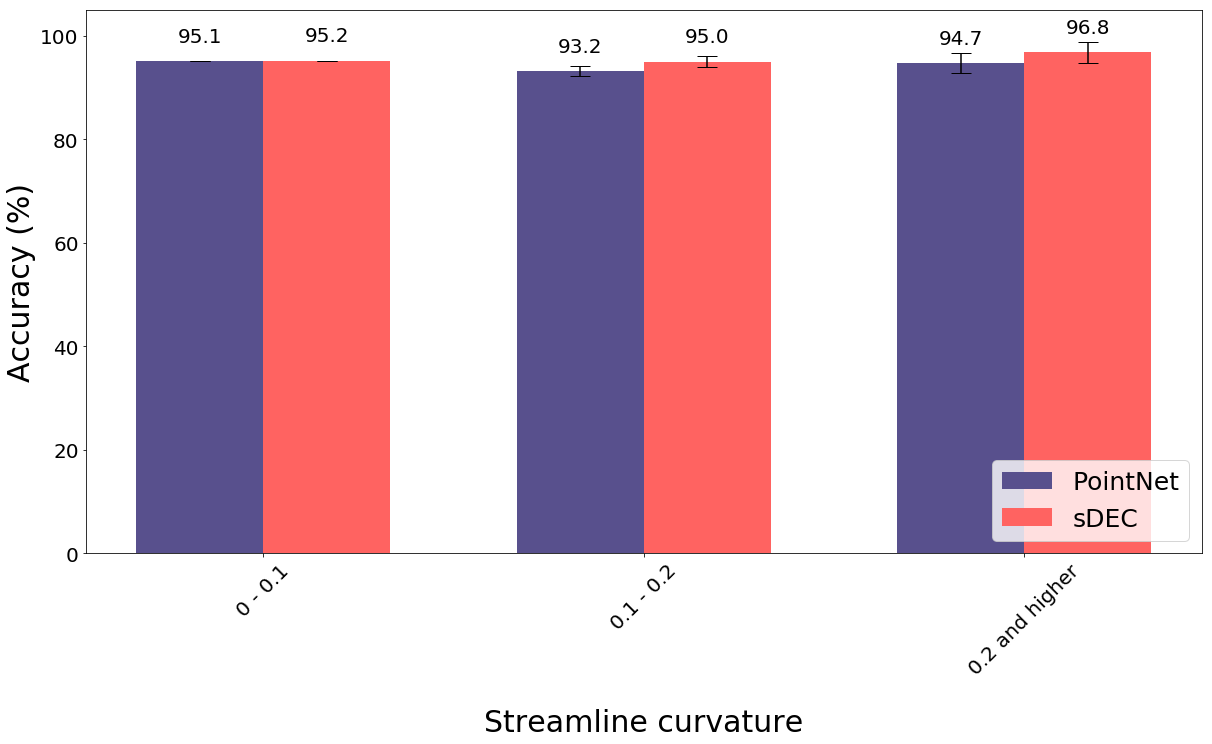

In [155]:
import matplotlib
import matplotlib.pyplot as plt

labels=['0 - 0.1','0.1 - 0.2','0.2 and higher']
sdeq = acc_binned_sdeq.values()
pn = acc_binned_pn.values()

rnd_sdeq = []
rnd_pn = []

for i in sdeq:
    i = round(i,1)
    rnd_sdeq.append(i)
for i in pn:
    i = round(i,1)
    rnd_pn.append(i)

x = np.arange(len(labels))
width = .2

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar([.1,.7,1.3], rnd_pn, width,yerr=acc_binned_pn_sd,ecolor='black',capsize=10,label='PointNet',color='#58508d')
rects2 = ax.bar([.3,.9,1.5], rnd_sdeq, width,yerr=acc_binned_sdeq_sd,ecolor='black',capsize=10, label='sDEC',color='#ff6361')

ax.set_xlabel('Streamline curvature',fontsize=30,labelpad=30)
ax.set_ylabel('Accuracy (%)',fontsize=30)
ax.set_xticks([.2,.8,1.4])
ax.set_xticklabels(labels,fontsize=30)
plt.legend(loc='lower right', prop={'size': 25})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,105)
#plt.savefig('dec_acc.png')
plt.show()

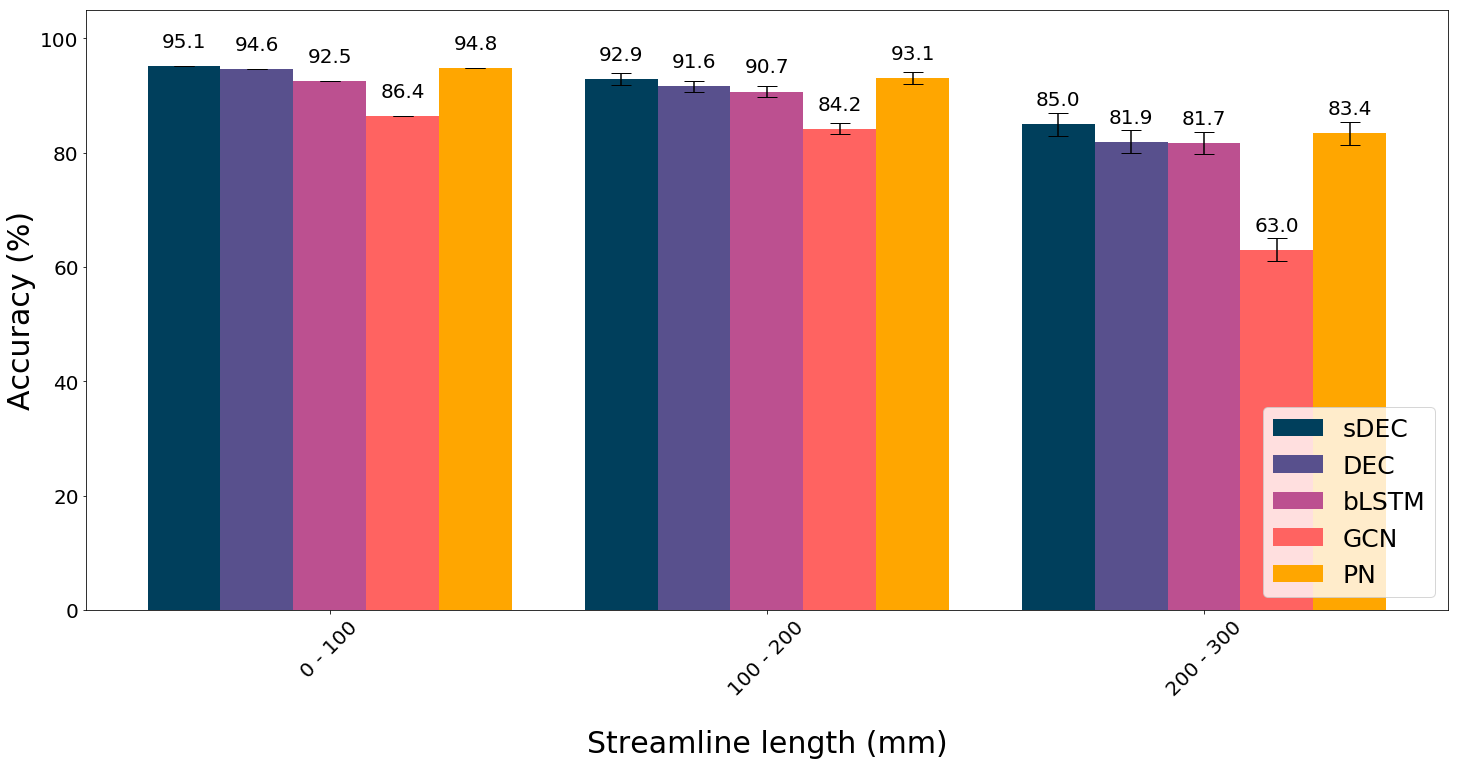

In [171]:
import matplotlib
import matplotlib.pyplot as plt

labels=['0 - 100','100 - 200','200 - 300']
gcn = acc_binned_gcn.values()
sdeq = acc_binned_sdeq.values()
blstm = acc_binned_blstm.values()
dec = acc_binned_dec.values()
pn = acc_binned_pn.values()
#s620 = acc_binned_s620.values()

rnd_gcn = []
rnd_sdeq = []
rnd_blstm = []
rnd_dec = []
rnd_pn = []
#rnd_620 = []

for i in gcn:
    i = round(i,1)
    rnd_gcn.append(i)
for i in sdeq:
    i = round(i,1)
    rnd_sdeq.append(i)
for i in blstm:
    i = round(i,1)
    rnd_blstm.append(i)
for i in dec:
    i = round(i,1)
    rnd_dec.append(i)
for i in pn:
    i = round(i,1)
    rnd_pn.append(i)
#for i in s620:
#    i = round(i,1)
#    rnd_620.append(i)


x = np.arange(len(labels))
width = .2

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar([.1,1.3,2.5], rnd_sdeq, width,yerr=acc_binned_sdeq_sd,ecolor='black',capsize=10,label='sDEC',color='#003f5c')
rects2 = ax.bar([.3,1.5,2.7], rnd_dec, width,yerr=acc_binned_dec_sd,ecolor='black',capsize=10, label='DEC',color='#58508d')
rects3 = ax.bar([.5,1.7,2.9], rnd_blstm, width,yerr=acc_binned_blstm_sd,ecolor='black',capsize=10, label='bLSTM',color='#bc5090')
rects4 = ax.bar([.7,1.9,3.1], rnd_gcn, width,yerr=acc_binned_gcn_sd,ecolor='black',capsize=10, label='GCN',color='#ff6361')
rects5 = ax.bar([.9,2.1,3.3], rnd_pn, width,yerr=acc_binned_pn_sd,ecolor='black',capsize=10, label='PN',color='#ffa600')
#rects4 = ax.bar(x + width/.405, rnd_620, width, label='sub-105620',color='#ffa600')


ax.set_xlabel('Streamline length (mm)',fontsize=30,labelpad=30)
ax.set_ylabel('Accuracy (%)',fontsize=30)
ax.set_xticks([0.5,1.7,2.9])
ax.set_xticklabels(labels,fontsize=30)
plt.legend(loc='lower right', prop={'size': 25})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,105)
#plt.savefig('dec_acc.png')
plt.show()

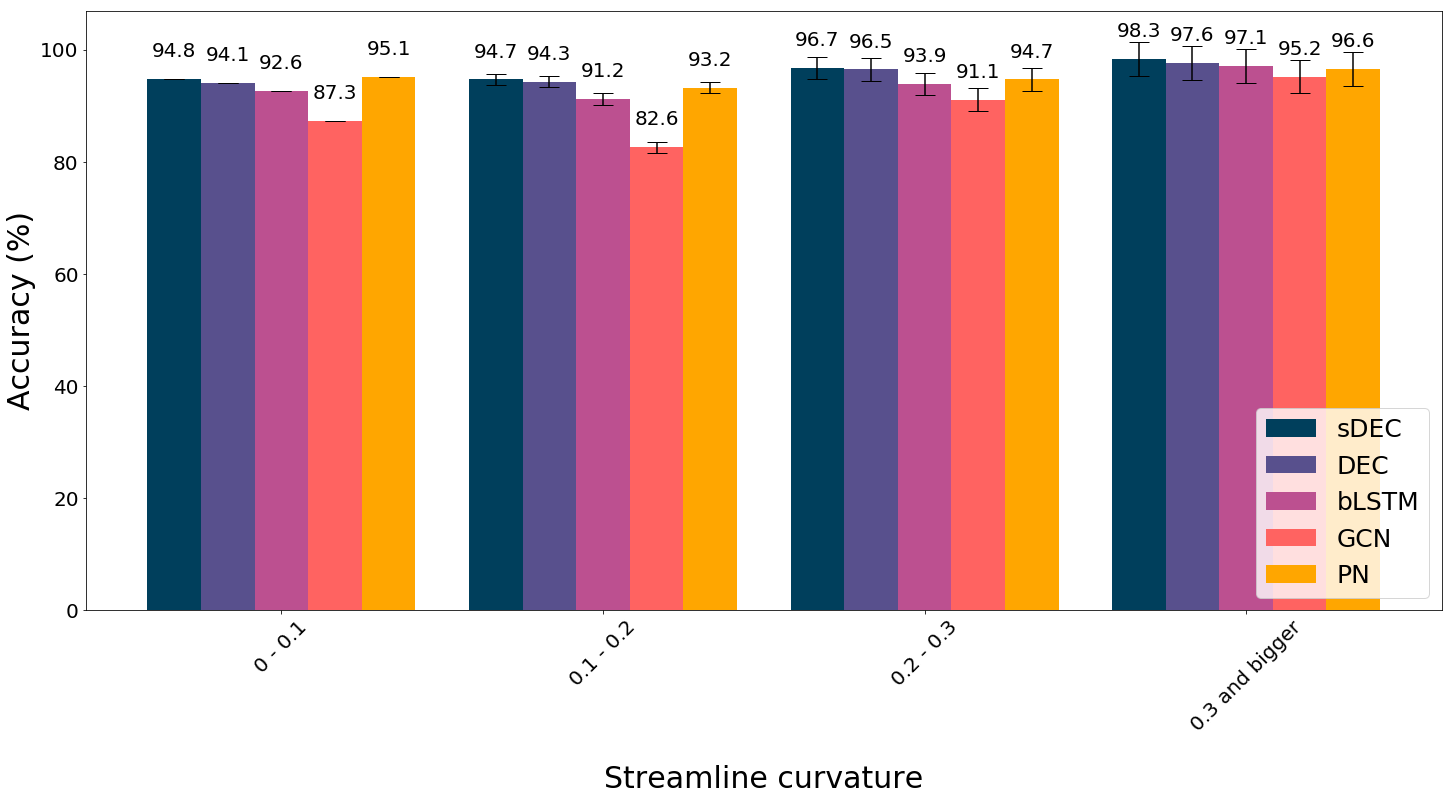

In [137]:
import matplotlib
import matplotlib.pyplot as plt

labels=['0 - 0.1','0.1 - 0.2','0.2 - 0.3', '0.3 and bigger']
gcn = acc_binned_gcn.values()
sdeq = acc_binned_sdeq.values()
blstm = acc_binned_blstm.values()
dec = acc_binned_dec.values()
pn = acc_binned_pn.values()
#s620 = acc_binned_s620.values()

rnd_gcn = []
rnd_sdeq = []
rnd_blstm = []
rnd_dec = []
rnd_pn = []
#rnd_620 = []

for i in gcn:
    i = round(i,1)
    rnd_gcn.append(i)
for i in sdeq:
    i = round(i,1)
    rnd_sdeq.append(i)
for i in blstm:
    i = round(i,1)
    rnd_blstm.append(i)
for i in dec:
    i = round(i,1)
    rnd_dec.append(i)
for i in pn:
    i = round(i,1)
    rnd_pn.append(i)
#for i in s620:
#    i = round(i,1)
#    rnd_620.append(i)


x = np.arange(len(labels))
width = .2

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar([.1,1.3,2.5,3.7], rnd_sdeq, width,yerr=acc_binned_sdeq_sd,ecolor='black',capsize=10,label='sDEC',color='#003f5c')
rects2 = ax.bar([.3,1.5,2.7,3.9], rnd_dec, width,yerr=acc_binned_dec_sd,ecolor='black',capsize=10, label='DEC',color='#58508d')
rects3 = ax.bar([.5,1.7,2.9,4.1], rnd_blstm, width,yerr=acc_binned_blstm_sd,ecolor='black',capsize=10, label='bLSTM',color='#bc5090')
rects4 = ax.bar([.7,1.9,3.1,4.3], rnd_gcn, width,yerr=acc_binned_gcn_sd,ecolor='black',capsize=10, label='GCN',color='#ff6361')
rects5 = ax.bar([.9,2.1,3.3,4.5], rnd_pn, width,yerr=acc_binned_pn_sd,ecolor='black',capsize=10, label='PN',color='#ffa600')
#rects4 = ax.bar(x + width/.405, rnd_620, width, label='sub-105620',color='#ffa600')


ax.set_xlabel('Streamline curvature',fontsize=30,labelpad=30)
ax.set_ylabel('Accuracy (%)',fontsize=30)
ax.set_xticks([0.5,1.7,2.9,4.1])
ax.set_xticklabels(labels,fontsize=30)
plt.legend(loc='lower right', prop={'size': 25})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 18),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,107)
#plt.savefig('dec_acc.png')
plt.show()

# Error distribution

In [156]:
fp_014_pn = []
fn_014_pn = []
for i, item in enumerate(y_test_s014_pn):
    if y_test_s014_pn[i]==0 and y_pred_s014_pn[i]==1:
        fp_014_pn.append(i)
    if y_test_s014_pn[i]==1 and y_pred_s014_pn[i]==0:
        fn_014_pn.append(i)
        
fp_115_pn = []
fn_115_pn = []
for i, item in enumerate(y_test_s115_pn):
    if y_test_s115_pn[i]==0 and y_pred_s115_pn[i]==1:
        fp_115_pn.append(i)
    if y_test_s115_pn[i]==1 and y_pred_s115_pn[i]==0:
        fn_115_pn.append(i)
        
fp_216_pn = []
fn_216_pn = []
for i, item in enumerate(y_test_s216_pn):
    if y_test_s216_pn[i]==0 and y_pred_s216_pn[i]==1:
        fp_216_pn.append(i)
    if y_test_s216_pn[i]==1 and y_pred_s216_pn[i]==0:
        fn_216_pn.append(i)
        
fp_620_pn = []
fn_620_pn = []
for i, item in enumerate(y_test_s620_pn):
    if y_test_s620_pn[i]==0 and y_pred_s620_pn[i]==1:
        fp_620_pn.append(i)
    if y_test_s620_pn[i]==1 and y_pred_s620_pn[i]==0:
        fn_620_pn.append(i)

In [157]:
fp_014_sdeq = []
fn_014_sdeq = []
for i, item in enumerate(y_test_s014_sdeq):
    if y_test_s014_sdeq[i]==0 and y_pred_s014_sdeq[i]==1:
        fp_014_sdeq.append(i)
    if y_test_s014_sdeq[i]==1 and y_pred_s014_sdeq[i]==0:
        fn_014_sdeq.append(i)
        
fp_115_sdeq = []
fn_115_sdeq = []
for i, item in enumerate(y_test_s115_sdeq):
    if y_test_s115_sdeq[i]==0 and y_pred_s115_sdeq[i]==1:
        fp_115_sdeq.append(i)
    if y_test_s115_sdeq[i]==1 and y_pred_s115_sdeq[i]==0:
        fn_115_sdeq.append(i)
        
fp_216_sdeq = []
fn_216_sdeq = []
for i, item in enumerate(y_test_s216_sdeq):
    if y_test_s216_sdeq[i]==0 and y_pred_s216_sdeq[i]==1:
        fp_216_sdeq.append(i)
    if y_test_s216_sdeq[i]==1 and y_pred_s216_sdeq[i]==0:
        fn_216_sdeq.append(i)
        
fp_620_sdeq = []
fn_620_sdeq = []
for i, item in enumerate(y_test_s620_sdeq):
    if y_test_s620_sdeq[i]==0 and y_pred_s620_sdeq[i]==1:
        fp_620_sdeq.append(i)
    if y_test_s620_sdeq[i]==1 and y_pred_s620_sdeq[i]==0:
        fn_620_sdeq.append(i)

In [18]:
idxs_fp = np.random.choice(np.arange(len(fp_gin)),100,replace=False)

In [22]:
idxs_fn = np.random.choice(np.arange(len(fn_gin)),100,replace=False)

In [192]:
fp_lengths_014_pn = []
for i in fp_014_pn:
    fp_lengths_014_pn.append(lengths_s014[i])
fn_lengths_014_pn = []
for i in fn_014_pn:
    fn_lengths_014_pn.append(lengths_s014[i])
    
fp_lengths_115_pn = []
for i in fp_115_pn:
    fp_lengths_115_pn.append(lengths_s115[i])
fn_lengths_115_pn = []
for i in fn_115_pn:
    fn_lengths_115_pn.append(lengths_s115[i])
    
fp_lengths_216_pn = []
for i in fp_216_pn:
    fp_lengths_216_pn.append(lengths_s216[i])
fn_lengths_216_pn = []
for i in fn_216_pn:
    fn_lengths_216_pn.append(lengths_s216[i])
    
fp_lengths_620_pn = []
for i in fp_620_pn:
    fp_lengths_620_pn.append(lengths_s620[i])
fn_lengths_620_pn = []
for i in fn_620_pn:
    fn_lengths_620_pn.append(lengths_s620[i])

In [193]:
fp_lengths_014_sdeq = []
for i in fp_014_sdeq:
    fp_lengths_014_sdeq.append(lengths_s014[i])
fn_lengths_014_sdeq = []
for i in fn_014_sdeq:
    fn_lengths_014_sdeq.append(lengths_s014[i])
    
fp_lengths_115_sdeq = []
for i in fp_115_sdeq:
    fp_lengths_115_sdeq.append(lengths_s115[i])
fn_lengths_115_sdeq = []
for i in fn_115_sdeq:
    fn_lengths_115_sdeq.append(lengths_s115[i])
    
fp_lengths_216_sdeq = []
for i in fp_216_sdeq:
    fp_lengths_216_sdeq.append(lengths_s216[i])
fn_lengths_216_sdeq = []
for i in fn_216_sdeq:
    fn_lengths_216_sdeq.append(lengths_s216[i])
    
fp_lengths_620_sdeq = []
for i in fp_620_sdeq:
    fp_lengths_620_sdeq.append(lengths_s620[i])
fn_lengths_620_sdeq = []
for i in fn_620_sdeq:
    fn_lengths_620_sdeq.append(lengths_s620[i])

In [158]:
fp_curve_014_pn = []
for i in fp_014_pn:
    fp_curve_014_pn.append(curve_014[i])
fn_curve_014_pn = []
for i in fn_014_pn:
    fn_curve_014_pn.append(curve_014[i])
    
fp_curve_115_pn = []
for i in fp_115_pn:
    fp_curve_115_pn.append(curve_115[i])
fn_curve_115_pn = []
for i in fn_115_pn:
    fn_curve_115_pn.append(curve_115[i])
    
fp_curve_216_pn = []
for i in fp_216_pn:
    fp_curve_216_pn.append(curve_216[i])
fn_curve_216_pn = []
for i in fn_216_pn:
    fn_curve_216_pn.append(curve_216[i])
    
fp_curve_620_pn = []
for i in fp_620_pn:
    fp_curve_620_pn.append(curve_620[i])
fn_curve_620_pn = []
for i in fn_620_pn:
    fn_curve_620_pn.append(curve_620[i])

In [159]:
fp_curve_014_sdeq = []
for i in fp_014_sdeq:
    fp_curve_014_sdeq.append(curve_014[i])
fn_curve_014_sdeq = []
for i in fn_014_sdeq:
    fn_curve_014_sdeq.append(curve_014[i])
    
fp_curve_115_sdeq = []
for i in fp_115_sdeq:
    fp_curve_115_sdeq.append(curve_115[i])
fn_curve_115_sdeq = []
for i in fn_115_sdeq:
    fn_curve_115_sdeq.append(curve_115[i])
    
fp_curve_216_sdeq = []
for i in fp_216_sdeq:
    fp_curve_216_sdeq.append(curve_216[i])
fn_curve_216_sdeq = []
for i in fn_216_sdeq:
    fn_curve_216_sdeq.append(curve_216[i])
    
fp_curve_620_sdeq = []
for i in fp_620_sdeq:
    fp_curve_620_sdeq.append(curve_620[i])
fn_curve_620_sdeq = []
for i in fn_620_sdeq:
    fn_curve_620_sdeq.append(curve_620[i])

In [194]:
from collections import Counter
binned_fp_014_pn = []
for value in fp_lengths_014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_014_pn.append(bin_index)
    
frequencies_fp_014_pn = Counter(binned_fp_014_pn)

binned_fp_115_pn = []
for value in fp_lengths_115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_115_pn.append(bin_index)
    
frequencies_fp_115_pn = Counter(binned_fp_115_pn)

binned_fp_216_pn = []
for value in fp_lengths_216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_216_pn.append(bin_index)
    
frequencies_fp_216_pn = Counter(binned_fp_216_pn)

binned_fp_620_pn = []
for value in fp_lengths_620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_620_pn.append(bin_index)
    
frequencies_fp_620_pn = Counter(binned_fp_620_pn)

In [196]:
from collections import Counter
binned_fn_014_pn = []
for value in fn_lengths_014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_014_pn.append(bin_index)
    
frequencies_fn_014_pn = Counter(binned_fn_014_pn)

binned_fn_115_pn = []
for value in fn_lengths_115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_115_pn.append(bin_index)
    
frequencies_fn_115_pn = Counter(binned_fn_115_pn)

binned_fn_216_pn = []
for value in fn_lengths_216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_216_pn.append(bin_index)
    
frequencies_fn_216_pn = Counter(binned_fn_216_pn)

binned_fn_620_pn = []
for value in fn_lengths_620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_620_pn.append(bin_index)
    
frequencies_fn_620_pn = Counter(binned_fn_620_pn)

In [195]:
from collections import Counter
binned_fp_014_sdeq = []
for value in fp_lengths_014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_014_sdeq.append(bin_index)
    
frequencies_fp_014_sdeq = Counter(binned_fp_014_sdeq)

binned_fp_115_sdeq = []
for value in fp_lengths_115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_115_sdeq.append(bin_index)
    
frequencies_fp_115_sdeq = Counter(binned_fp_115_sdeq)

binned_fp_216_sdeq = []
for value in fp_lengths_216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_216_sdeq.append(bin_index)
    
frequencies_fp_216_sdeq = Counter(binned_fp_216_sdeq)

binned_fp_620_sdeq = []
for value in fp_lengths_620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_620_sdeq.append(bin_index)
    
frequencies_fp_620_sdeq = Counter(binned_fp_620_sdeq)

In [197]:
from collections import Counter
binned_fn_014_sdeq = []
for value in fn_lengths_014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_014_sdeq.append(bin_index)
    
frequencies_fn_014_sdeq = Counter(binned_fn_014_sdeq)

binned_fn_115_sdeq = []
for value in fn_lengths_115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_115_sdeq.append(bin_index)
    
frequencies_fn_115_sdeq = Counter(binned_fn_115_sdeq)

binned_fn_216_sdeq = []
for value in fn_lengths_216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_216_sdeq.append(bin_index)
    
frequencies_fn_216_sdeq = Counter(binned_fn_216_sdeq)

binned_fn_620_sdeq = []
for value in fn_lengths_620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_620_sdeq.append(bin_index)
    
frequencies_fn_620_sdeq = Counter(binned_fn_620_sdeq)

In [227]:
from collections import Counter
binned_fn_014_pn = []
for value in fn_curve_014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_014_pn.append(bin_index)
    
frequencies_fn_014_pn = Counter(binned_fn_014_pn)

binned_fn_115_pn = []
for value in fn_curve_115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_115_pn.append(bin_index)
    
frequencies_fn_115_pn = Counter(binned_fn_115_pn)

binned_fn_216_pn = []
for value in fn_curve_216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_216_pn.append(bin_index)
    
frequencies_fn_216_pn = Counter(binned_fn_216_pn)

binned_fn_620_pn = []
for value in fn_curve_620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_620_pn.append(bin_index)
    
frequencies_fn_620_pn = Counter(binned_fn_620_pn)

In [228]:
from collections import Counter
binned_fp_014_pn = []
for value in fp_curve_014_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_014_pn.append(bin_index)
    
frequencies_fp_014_pn = Counter(binned_fp_014_pn)

binned_fp_115_pn = []
for value in fp_curve_115_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_115_pn.append(bin_index)
    
frequencies_fp_115_pn = Counter(binned_fp_115_pn)

binned_fp_216_pn = []
for value in fp_curve_216_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_216_pn.append(bin_index)
    
frequencies_fp_216_pn = Counter(binned_fp_216_pn)

binned_fp_620_pn = []
for value in fp_curve_620_pn:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_620_pn.append(bin_index)
    
frequencies_fp_620_pn = Counter(binned_fp_620_pn)

In [229]:
from collections import Counter
binned_fn_014_sdeq = []
for value in fn_curve_014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_014_sdeq.append(bin_index)
    
frequencies_fn_014_sdeq = Counter(binned_fn_014_sdeq)

binned_fn_115_sdeq = []
for value in fn_curve_115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_115_sdeq.append(bin_index)
    
frequencies_fn_115_sdeq = Counter(binned_fn_115_sdeq)

binned_fn_216_sdeq = []
for value in fn_curve_216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_216_sdeq.append(bin_index)
    
frequencies_fn_216_sdeq = Counter(binned_fn_216_sdeq)

binned_fn_620_sdeq = []
for value in fn_curve_620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fn_620_sdeq.append(bin_index)
    
frequencies_fn_620_sdeq = Counter(binned_fn_620_sdeq)

In [230]:
from collections import Counter
binned_fp_014_sdeq = []
for value in fp_curve_014_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_014_sdeq.append(bin_index)
    
frequencies_fp_014_sdeq = Counter(binned_fp_014_sdeq)

binned_fp_115_sdeq = []
for value in fp_curve_115_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_115_sdeq.append(bin_index)
    
frequencies_fp_115_sdeq = Counter(binned_fp_115_sdeq)

binned_fp_216_sdeq = []
for value in fp_curve_216_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_216_sdeq.append(bin_index)
    
frequencies_fp_216_sdeq = Counter(binned_fp_216_sdeq)

binned_fp_620_sdeq = []
for value in fp_curve_620_sdeq:
    bin_index = find_bin(value, bins)
    #print(value, bin_index, bins[bin_index])
    binned_fp_620_sdeq.append(bin_index)
    
frequencies_fp_620_sdeq = Counter(binned_fp_620_sdeq)

In [231]:
frequencies_fp_014_pn

Counter({-1: 17, 0: 19056, 1: 8510, 2: 172})

In [199]:
frequencies_fn_014_pn

Counter({0: 21689, 1: 3910, 2: 150})

In [232]:
for i,c in enumerate(binned_fn_014_pn):
    if c==-1:
        #print(i,fn_curve_014[i])
        if fn_curve_014_pn[i]>.3:
            frequencies_fn_014_pn[2]+=1
        if fn_curve_014_pn[i]<0:
            frequencies_fn_014_pn[0]+=1
            
for i,c in enumerate(binned_fn_115_pn):
    if c==-1:
        #print(i,fn_curve_115[i])
        if fn_curve_115_pn[i]>.3:
            frequencies_fn_115_pn[2]+=1
        if fn_curve_115_pn[i]<0:
            frequencies_fn_115_pn[0]+=1
            
for i,c in enumerate(binned_fn_216_pn):
    if c==-1:
        #print(i,fn_curve_216[i])
        if fn_curve_216_pn[i]>.3:
            frequencies_fn_216_pn[2]+=1
        if fn_curve_216_pn[i]<0:
            frequencies_fn_216_pn[0]+=1
            
for i,c in enumerate(binned_fn_620_pn):
    if c==-1:
        #print(i,fn_curve_620[i])
        if fn_curve_620_pn[i]>.3:
            frequencies_fn_620_pn[2]+=1
        if fn_curve_620_pn[i]<0:
            frequencies_fn_620_pn[0]+=1

In [233]:
for i,c in enumerate(binned_fp_014_pn):
    if c==-1:
        #print(i,fp_curve_014[i])
        if fp_curve_014_pn[i]>.3:
            frequencies_fp_014_pn[2]+=1
        if fp_curve_014_pn[i]<0:
            frequencies_fp_014_pn[0]+=1
            
for i,c in enumerate(binned_fp_115_pn):
    if c==-1:
        #print(i,fp_curve_115[i])
        if fp_curve_115_pn[i]>.3:
            frequencies_fp_115_pn[2]+=1
        if fp_curve_115_pn[i]<0:
            frequencies_fp_115_pn[0]+=1
            
for i,c in enumerate(binned_fp_216_pn):
    if c==-1:
        #print(i,fp_curve_216[i])
        if fp_curve_216_pn[i]>.3:
            frequencies_fp_216_pn[2]+=1
        if fp_curve_216_pn[i]<0:
            frequencies_fp_216_pn[0]+=1
            
for i,c in enumerate(binned_fp_620_pn):
    if c==-1:
        #print(i,fp_curve_620[i])
        if fp_curve_620_pn[i]>.3:
            frequencies_fp_620_pn[2]+=1
        if fp_curve_620_pn[i]<0:
            frequencies_fp_620_pn[0]+=1

In [234]:
for i,c in enumerate(binned_fn_014_sdeq):
    if c==-1:
        #print(i,fn_curve_014[i])
        if fn_curve_014_sdeq[i]>.3:
            frequencies_fn_014_sdeq[2]+=1
        if fn_curve_014_sdeq[i]<0:
            frequencies_fn_014_sdeq[0]+=1
            
for i,c in enumerate(binned_fn_115_sdeq):
    if c==-1:
        #print(i,fn_curve_115[i])
        if fn_curve_115_sdeq[i]>.3:
            frequencies_fn_115_sdeq[2]+=1
        if fn_curve_115_sdeq[i]<0:
            frequencies_fn_115_sdeq[0]+=1
            
for i,c in enumerate(binned_fn_216_sdeq):
    if c==-1:
        #print(i,fn_curve_216[i])
        if fn_curve_216_sdeq[i]>.3:
            frequencies_fn_216_sdeq[2]+=1
        if fn_curve_216_sdeq[i]<0:
            frequencies_fn_216_sdeq[0]+=1
            
for i,c in enumerate(binned_fn_620_sdeq):
    if c==-1:
        #print(i,fn_curve_620[i])
        if fn_curve_620_sdeq[i]>.3:
            frequencies_fn_620_sdeq[2]+=1
        if fn_curve_620_sdeq[i]<0:
            frequencies_fn_620_sdeq[0]+=1

In [235]:
for i,c in enumerate(binned_fp_014_sdeq):
    if c==-1:
        #print(i,fp_curve_014[i])
        if fp_curve_014_sdeq[i]>.3:
            frequencies_fp_014_sdeq[2]+=1
        if fp_curve_014_sdeq[i]<0:
            frequencies_fp_014_sdeq[0]+=1
            
for i,c in enumerate(binned_fp_115_sdeq):
    if c==-1:
        #print(i,fp_curve_115[i])
        if fp_curve_115_sdeq[i]>.3:
            frequencies_fp_115_sdeq[2]+=1
        if fp_curve_115_sdeq[i]<0:
            frequencies_fp_115_sdeq[0]+=1
            
for i,c in enumerate(binned_fp_216_sdeq):
    if c==-1:
        #print(i,fp_curve_216[i])
        if fp_curve_216_sdeq[i]>.3:
            frequencies_fp_216_sdeq[2]+=1
        if fp_curve_216_sdeq[i]<0:
            frequencies_fp_216_sdeq[0]+=1
            
for i,c in enumerate(binned_fp_620_sdeq):
    if c==-1:
        #print(i,fp_curve_620[i])
        if fp_curve_620_sdeq[i]>.3:
            frequencies_fp_620_sdeq[2]+=1
        if fp_curve_620_sdeq[i]<0:
            frequencies_fp_620_sdeq[0]+=1

In [236]:
for f in [frequencies_fn_014_pn,frequencies_fn_115_pn, frequencies_fn_216_pn,frequencies_fn_620_pn]:
    del f[-1]

In [237]:
for f in [frequencies_fp_014_pn,frequencies_fp_115_pn, frequencies_fp_216_pn,frequencies_fp_620_pn]:
    del f[-1]

In [238]:
for f in [frequencies_fn_014_sdeq,frequencies_fn_115_sdeq, frequencies_fn_216_sdeq,frequencies_fn_620_sdeq]:
    del f[-1]

In [239]:
for f in [frequencies_fp_014_sdeq,frequencies_fp_115_sdeq, frequencies_fp_216_sdeq,frequencies_fp_620_sdeq]:
    del f[-1]

In [240]:
fp_perc_014_pn = {}
fn_perc_014_pn = {}
for i in frequencies_fp_014_pn.keys():
    fp_perc_014_pn[i] = (frequencies_fp_014_pn[i]/(frequencies_fp_014_pn[i]+frequencies_fn_014_pn[i]))*100
    fn_perc_014_pn[i] = (frequencies_fn_014_pn[i]/(frequencies_fp_014_pn[i]+frequencies_fn_014_pn[i]))*100
    
fp_perc_115_pn = {}
fn_perc_115_pn = {}
for i in frequencies_fp_115_pn.keys():
    fp_perc_115_pn[i] = (frequencies_fp_115_pn[i]/(frequencies_fp_115_pn[i]+frequencies_fn_115_pn[i]))*100
    fn_perc_115_pn[i] = (frequencies_fn_115_pn[i]/(frequencies_fp_115_pn[i]+frequencies_fn_115_pn[i]))*100
    
fp_perc_216_pn = {}
fn_perc_216_pn = {}
for i in frequencies_fp_216_pn.keys():
    fp_perc_216_pn[i] = (frequencies_fp_216_pn[i]/(frequencies_fp_216_pn[i]+frequencies_fn_216_pn[i]))*100
    fn_perc_216_pn[i] = (frequencies_fn_216_pn[i]/(frequencies_fp_216_pn[i]+frequencies_fn_216_pn[i]))*100
    
fp_perc_620_pn = {}
fn_perc_620_pn = {}
for i in frequencies_fp_620_pn.keys():
    fp_perc_620_pn[i] = (frequencies_fp_620_pn[i]/(frequencies_fp_620_pn[i]+frequencies_fn_620_pn[i]))*100
    fn_perc_620_pn[i] = (frequencies_fn_620_pn[i]/(frequencies_fp_620_pn[i]+frequencies_fn_620_pn[i]))*100

In [241]:
fp_perc_014_sdeq = {}
fn_perc_014_sdeq = {}
for i in frequencies_fp_014_sdeq.keys():
    fp_perc_014_sdeq[i] = (frequencies_fp_014_sdeq[i]/(frequencies_fp_014_sdeq[i]+frequencies_fn_014_sdeq[i]))*100
    fn_perc_014_sdeq[i] = (frequencies_fn_014_sdeq[i]/(frequencies_fp_014_sdeq[i]+frequencies_fn_014_sdeq[i]))*100
    
fp_perc_115_sdeq = {}
fn_perc_115_sdeq = {}
for i in frequencies_fp_115_sdeq.keys():
    fp_perc_115_sdeq[i] = (frequencies_fp_115_sdeq[i]/(frequencies_fp_115_sdeq[i]+frequencies_fn_115_sdeq[i]))*100
    fn_perc_115_sdeq[i] = (frequencies_fn_115_sdeq[i]/(frequencies_fp_115_sdeq[i]+frequencies_fn_115_sdeq[i]))*100
    
fp_perc_216_sdeq = {}
fn_perc_216_sdeq = {}
for i in frequencies_fp_216_sdeq.keys():
    fp_perc_216_sdeq[i] = (frequencies_fp_216_sdeq[i]/(frequencies_fp_216_sdeq[i]+frequencies_fn_216_sdeq[i]))*100
    fn_perc_216_sdeq[i] = (frequencies_fn_216_sdeq[i]/(frequencies_fp_216_sdeq[i]+frequencies_fn_216_sdeq[i]))*100
    
fp_perc_620_sdeq = {}
fn_perc_620_sdeq = {}
for i in frequencies_fp_620_sdeq.keys():
    fp_perc_620_sdeq[i] = (frequencies_fp_620_sdeq[i]/(frequencies_fp_620_sdeq[i]+frequencies_fn_620_sdeq[i]))*100
    fn_perc_620_sdeq[i] = (frequencies_fn_620_sdeq[i]/(frequencies_fp_620_sdeq[i]+frequencies_fn_620_sdeq[i]))*100

In [242]:
#bin1fp = np.mean([fp_perc_014.values()[0],fp_perc_115.values()[0],fp_perc_216.values()[0],fp_perc_620.values()[0]])
#bin2fp = np.mean([fp_perc_014.values()[1],fp_perc_115.values()[1],fp_perc_216.values()[1],fp_perc_620.values()[1]])
#bin3fp = np.mean([fp_perc_014.values()[2],fp_perc_115.values()[2],fp_perc_216.values()[2],fp_perc_620.values()[2]])

bin1fn_pn = np.mean([fn_perc_014_pn.values()[0],fn_perc_115_pn.values()[0],fn_perc_216_pn.values()[0],fn_perc_620_pn.values()[0]])
bin2fn_pn = np.mean([fn_perc_014_pn.values()[1],fn_perc_115_pn.values()[1],fn_perc_216_pn.values()[1],fn_perc_620_pn.values()[1]])
bin3fn_pn = np.mean([fn_perc_014_pn.values()[2],fn_perc_115_pn.values()[2],fn_perc_216_pn.values()[2],fn_perc_620_pn.values()[2]])

In [243]:
#bin1fp = np.std([fp_perc_014.values()[0],fp_perc_115.values()[0],fp_perc_216.values()[0],fp_perc_620.values()[0]])
#bin2fp = np.std([fp_perc_014.values()[1],fp_perc_115.values()[1],fp_perc_216.values()[1],fp_perc_620.values()[1]])
#bin3fp = np.std([fp_perc_014.values()[2],fp_perc_115.values()[2],fp_perc_216.values()[2],fp_perc_620.values()[2]])

bin1fn_pn_sd = np.std([fn_perc_014_pn.values()[0],fn_perc_115_pn.values()[0],fn_perc_216_pn.values()[0],fn_perc_620_pn.values()[0]])
bin2fn_pn_sd = np.std([fn_perc_014_pn.values()[1],fn_perc_115_pn.values()[1],fn_perc_216_pn.values()[1],fn_perc_620_pn.values()[1]])
bin3fn_pn_sd = np.std([fn_perc_014_pn.values()[2],fn_perc_115_pn.values()[2],fn_perc_216_pn.values()[2],fn_perc_620_pn.values()[2]])

In [244]:
#bin1fp = np.mean([fp_perc_014.values()[0],fp_perc_115.values()[0],fp_perc_216.values()[0],fp_perc_620.values()[0]])
#bin2fp = np.mean([fp_perc_014.values()[1],fp_perc_115.values()[1],fp_perc_216.values()[1],fp_perc_620.values()[1]])
#bin3fp = np.mean([fp_perc_014.values()[2],fp_perc_115.values()[2],fp_perc_216.values()[2],fp_perc_620.values()[2]])

bin1fn_sdeq = np.mean([fn_perc_014_sdeq.values()[0],fn_perc_115_sdeq.values()[0],fn_perc_216_sdeq.values()[0],fn_perc_620_sdeq.values()[0]])
bin2fn_sdeq = np.mean([fn_perc_014_sdeq.values()[1],fn_perc_115_sdeq.values()[1],fn_perc_216_sdeq.values()[1],fn_perc_620_sdeq.values()[1]])
bin3fn_sdeq = np.mean([fn_perc_014_sdeq.values()[2],fn_perc_115_sdeq.values()[2],fn_perc_216_sdeq.values()[2],fn_perc_620_sdeq.values()[2]])

In [245]:
#bin1fp = np.std([fp_perc_014.values()[0],fp_perc_115.values()[0],fp_perc_216.values()[0],fp_perc_620.values()[0]])
#bin2fp = np.std([fp_perc_014.values()[1],fp_perc_115.values()[1],fp_perc_216.values()[1],fp_perc_620.values()[1]])
#bin3fp = np.std([fp_perc_014.values()[2],fp_perc_115.values()[2],fp_perc_216.values()[2],fp_perc_620.values()[2]])

bin1fn_sdeq_sd = np.std([fn_perc_014_sdeq.values()[0],fn_perc_115_sdeq.values()[0],fn_perc_216_sdeq.values()[0],fn_perc_620_sdeq.values()[0]])
bin2fn_sdeq_sd = np.std([fn_perc_014_sdeq.values()[1],fn_perc_115_sdeq.values()[1],fn_perc_216_sdeq.values()[1],fn_perc_620_sdeq.values()[1]])
bin3fn_sdeq_sd = np.std([fn_perc_014_sdeq.values()[2],fn_perc_115_sdeq.values()[2],fn_perc_216_sdeq.values()[2],fn_perc_620_sdeq.values()[2]])

In [246]:
bin1fn_sdeq_sd

1.69176337783923

# Plotting error distribution

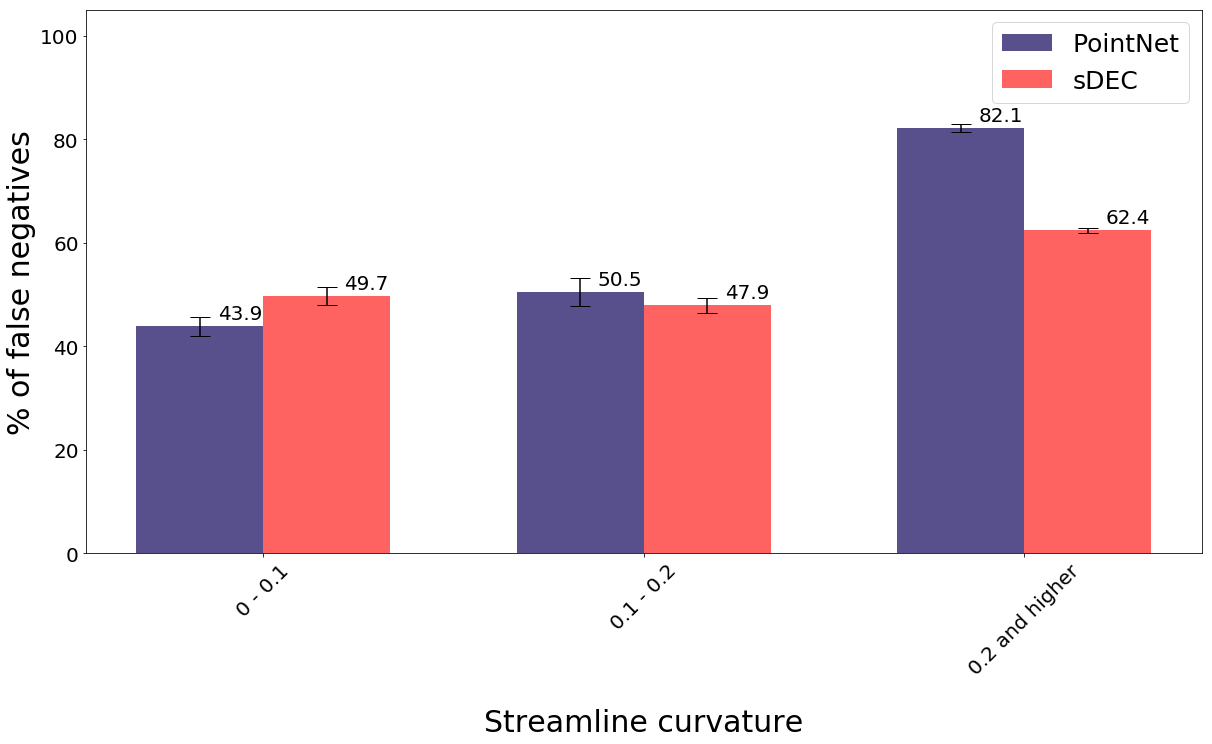

In [247]:
import matplotlib
import matplotlib.pyplot as plt

labels=['0 - 0.1','0.1 - 0.2','0.2 and higher']
sdeq = [bin1fn_sdeq,bin2fn_sdeq,bin3fn_sdeq]
pn = [bin1fn_pn,bin2fn_pn,bin3fn_pn]
sdeq_sd = [bin1fn_sdeq_sd,bin2fn_sdeq_sd,bin3fn_sdeq_sd]
pn_sd = [bin1fn_pn_sd,bin2fn_pn_sd,bin3fn_pn_sd]

rnd_sdeq = []
rnd_pn = []

for i in sdeq:
    i = round(i,1)
    rnd_sdeq.append(i)
for i in pn:
    i = round(i,1)
    rnd_pn.append(i)

x = np.arange(len(labels))
width = .2

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar([.1,.7,1.3], rnd_pn, width,yerr=pn_sd,ecolor='black',capsize=10,label='PointNet',color='#58508d')
rects2 = ax.bar([.3,.9,1.5], rnd_sdeq, width,yerr=sdeq_sd,ecolor='black',capsize=10, label='sDEC',color='#ff6361')

ax.set_xlabel('Streamline curvature',fontsize=30,labelpad=30)
ax.set_ylabel('% of false negatives',fontsize=30)
ax.set_xticks([.2,.8,1.4])
ax.set_xticklabels(labels,fontsize=30)
plt.legend(loc='upper right', prop={'size': 25})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(40, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,105)
#plt.savefig('dec_acc.png')
plt.show()

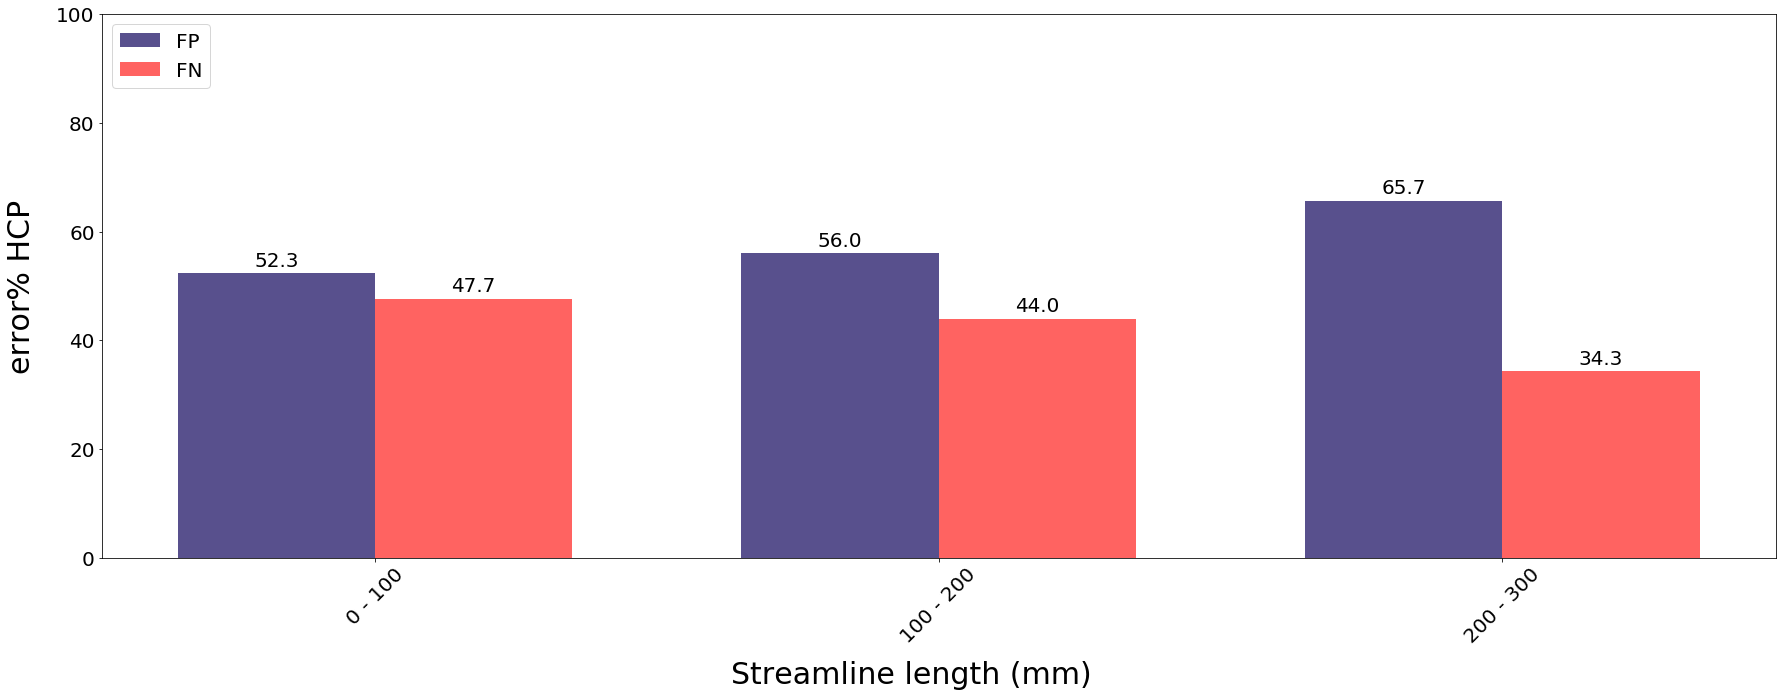

In [272]:
labels=['0 - 100','100 - 200','200 - 300']

fp014 = [bin1fp,bin2fp,bin3fp]
fn014 = [bin1fn,bin2fn,bin3fn]
rnd_fp014 = []
rnd_fn014 = []

for i in fp014:
    i = round(i,1)
    rnd_fp014.append(i)
for i in fn014:
    i = round(i,1)
    rnd_fn014.append(i)
    
x = np.arange(len(labels))
width = .35
    
fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(x - width/2, rnd_fp014, width, label='FP',color='#58508d')
rects2 = ax.bar(x + width/2, rnd_fn014, width, label='FN',color='#ff6361')

#rects3 = ax2.bar(x - width/2, rnd_fp115, width, label='FP')
#rects4 = ax2.bar(x + width/2, rnd_fn115, width, label='FN')

#rects5 = ax3.bar(x - width/2, rnd_fp216, width, label='FP')
#rects6 = ax3.bar(x + width/2, rnd_fn216, width, label='FN')

#rects7 = ax4.bar(x - width/2, rnd_fp620, width, label='FP')
#rects8 = ax4.bar(x + width/2, rnd_fn620, width, label='FN')

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=20)
        
autolabel1(rects1)
autolabel1(rects2)


ax.set_ylim([0,100])

plt.xticks([0,1,2],labels,fontsize=50)

plt.sca(ax)
plt.yticks(fontsize=20)

ax.legend(loc='upper left', prop={'size': 20})

fig.text(0.5,-0.05,'Streamline length (mm)',ha='center',fontsize=30)
#fig.text(0.07,1.6,'% of errors', ha='left',fontsize=30,rotation=90)
ax.set_ylabel('error% HCP',fontsize=30,labelpad=20)
#fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('decseq5_fp_vs_fn_GIN.png')
plt.show()